# Understanding Data Distributions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style consistent with previous tutorials
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=";")

# Display the first few rows of the dataset
print("First 5 rows of the Wine Quality dataset:")
print(wine_data.head())

First 5 rows of the Wine Quality dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  


In [4]:
# Basic dataset information
print("\nDataset Information:")
wine_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check for missing values
print("\nMissing values per column:")
print(wine_data.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# Basic statistics
print("\nBasic Statistical Summary:")
print(wine_data.describe())


Basic Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000  

# 1. Normal Distributions


Let us plot a synthetic normally distributed plot to learn about its shape before plotting the attributes from our dataset. <p>

scipy.stats.norm.pdf can be used for this purpose. (pdf stands for probability density function)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

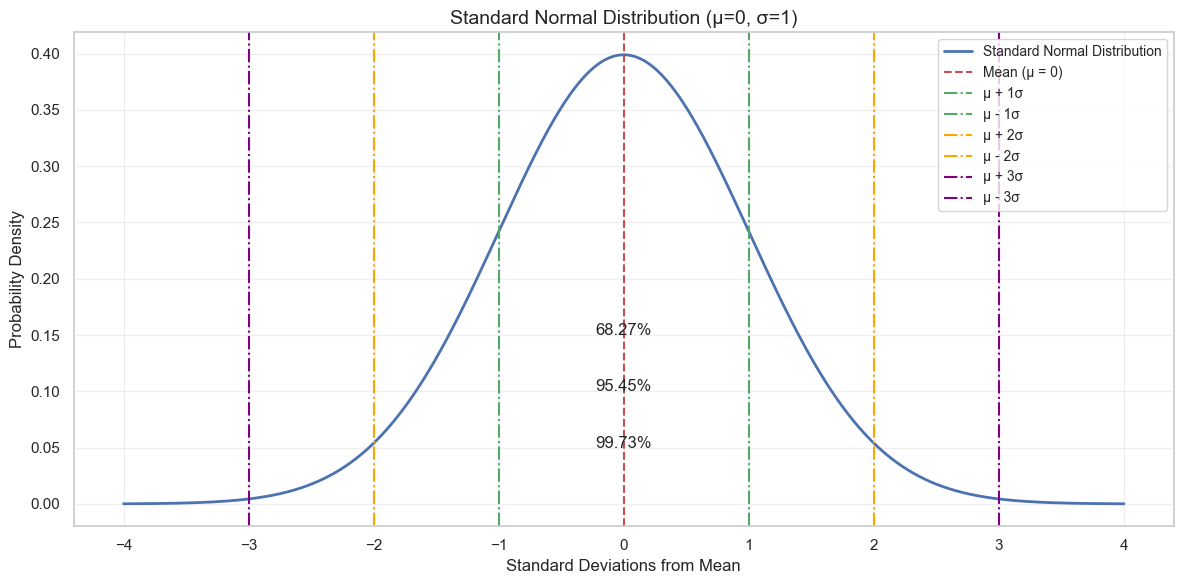


The Normal Distribution:
- Also known as the Gaussian distribution or 'bell curve'
- Characterized by its mean (μ) and standard deviation (σ)
- Symmetric around the mean
- Data distribution properties:
  * 68.27% of data falls within 1 standard deviation of the mean (μ ± 1σ)
  * 95.45% of data falls within 2 standard deviations of the mean (μ ± 2σ)
  * 99.73% of data falls within 3 standard deviations of the mean (μ ± 3σ)

Why is it important?
- Many statistical tests assume normally distributed data
- Allows us to make probability statements about the data
- Simplifies statistical inference and prediction


In [7]:
def plot_normal_distribution():
    """Plot and explain the theoretical normal distribution."""
    # Generate data for a normal distribution
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x, 0, 1)

    # Plot the normal distribution
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, 'b-', linewidth=2, label='Standard Normal Distribution')

    # Add vertical lines for standard deviations
    plt.axvline(x=0, color='r', linestyle='--', label='Mean (μ = 0)')
    plt.axvline(x=1, color='g', linestyle='-.', label='μ + 1σ')
    plt.axvline(x=-1, color='g', linestyle='-.', label='μ - 1σ')
    plt.axvline(x=2, color='orange', linestyle='-.', label='μ + 2σ')
    plt.axvline(x=-2, color='orange', linestyle='-.', label='μ - 2σ')
    plt.axvline(x=3, color='purple', linestyle='-.', label='μ + 3σ')
    plt.axvline(x=-3, color='purple', linestyle='-.', label='μ - 3σ')

    # Add annotations for percentages
    plt.annotate('68.27%', xy=(0, 0.15), xytext=(0, 0.15),
                 ha='center', fontsize=12)
    plt.annotate('95.45%', xy=(0, 0.1), xytext=(0, 0.1),
                 ha='center', fontsize=12)
    plt.annotate('99.73%', xy=(0, 0.05), xytext=(0, 0.05),
                 ha='center', fontsize=12)

    # Add title and labels
    plt.title('Standard Normal Distribution (μ=0, σ=1)', fontsize=14)
    plt.xlabel('Standard Deviations from Mean', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Explain the normal distribution
    print("\nThe Normal Distribution:")
    print("- Also known as the Gaussian distribution or 'bell curve'")
    print("- Characterized by its mean (μ) and standard deviation (σ)")
    print("- Symmetric around the mean")
    print("- Data distribution properties:")
    print("  * 68.27% of data falls within 1 standard deviation of the mean (μ ± 1σ)")
    print("  * 95.45% of data falls within 2 standard deviations of the mean (μ ± 2σ)")
    print("  * 99.73% of data falls within 3 standard deviations of the mean (μ ± 3σ)")
    print("\nWhy is it important?")
    print("- Many statistical tests assume normally distributed data")
    print("- Allows us to make probability statements about the data")
    print("- Simplifies statistical inference and prediction")

# Plot the theoretical normal distribution
plot_normal_distribution()



Now, let us check a few attributes from our dataset for normality using visual inspection, Q-Q plots, box plots, skewness, kurtosis and calculating a few quantitative metrics like Shapiro-Wilk test and Anderson-Darling Test.

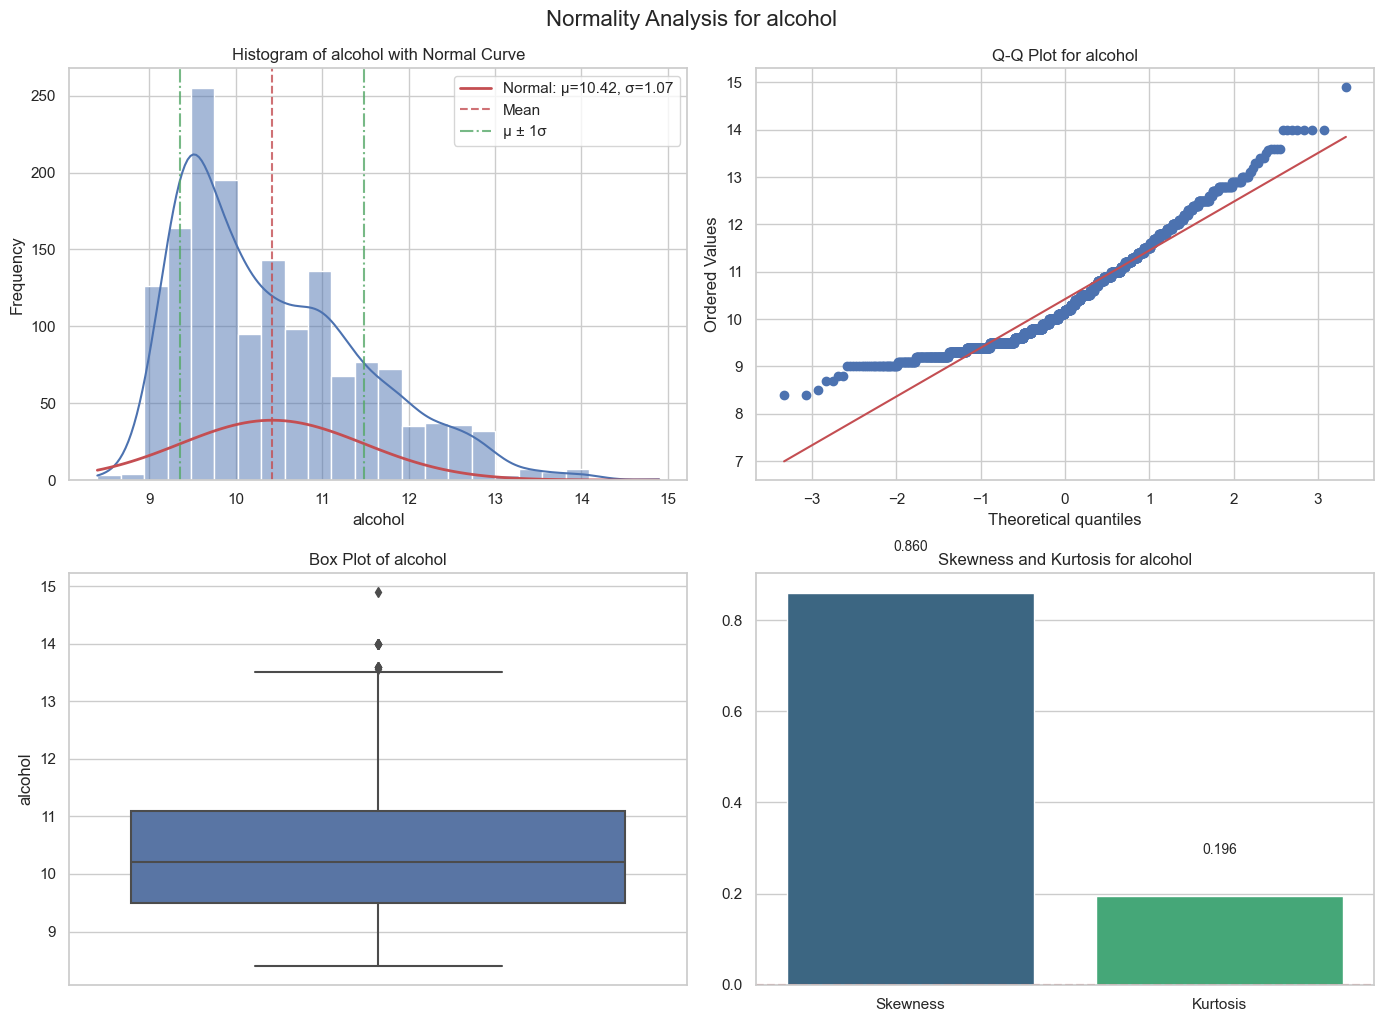


Normality Tests for alcohol:
Shapiro-Wilk Test: statistic=0.9288, p-value=0.000000
Interpretation (p << 0.05): Reject H0: Data is NOT normally distributed
Note that.. H₀: The data follows a normal distribution
 
Anderson-Darling Test: statistic=34.9171
Critical values at significance levels:
  15%: 0.5750 - Reject H0: Data is NOT normally distributed
  10%: 0.6540 - Reject H0: Data is NOT normally distributed
  5%: 0.7850 - Reject H0: Data is NOT normally distributed
  2.5%: 0.9160 - Reject H0: Data is NOT normally distributed
  1%: 1.0890 - Reject H0: Data is NOT normally distributed
Note that for Anderson-Darling test - If test statistic > critical value: Reject H₀ (data is NOT normal)
 

Skewness: 0.8600
  The distribution is positively skewed (right-tailed)
Note that ...
Skewness = 0: Perfectly symmetric distribution 
 Skewness > 0: Right-skewed (positive skew) - the right tail is longer 
 Skewness < 0: Left-skewed (negative skew) - the left tail is longer
 In our code, we set a l

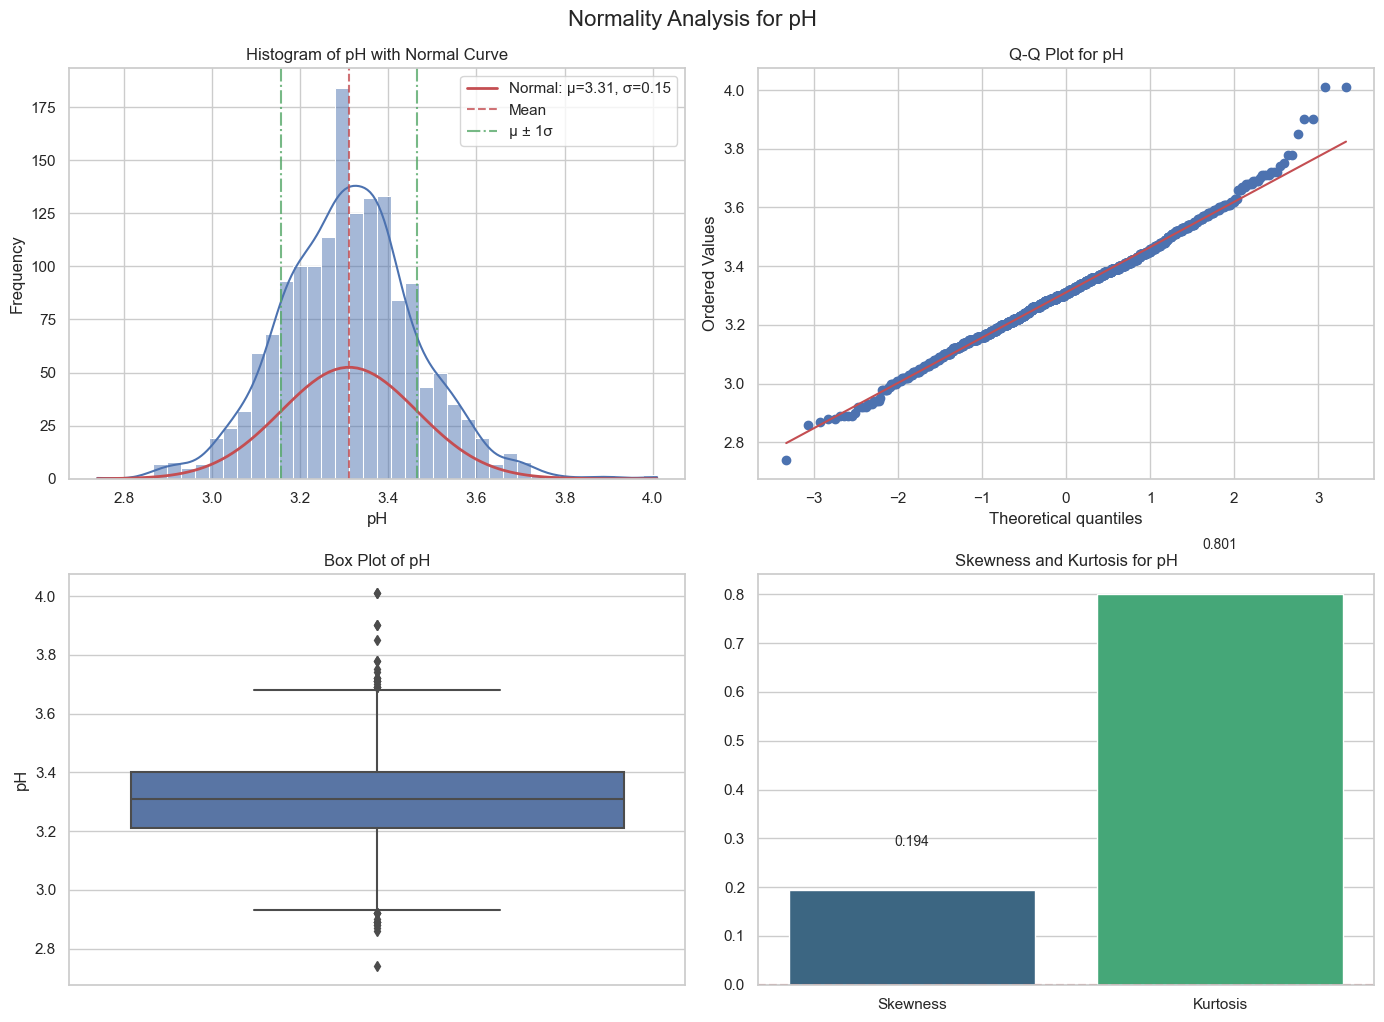


Normality Tests for pH:
Shapiro-Wilk Test: statistic=0.9935, p-value=0.000002
Interpretation (p << 0.05): Reject H0: Data is NOT normally distributed
Note that.. H₀: The data follows a normal distribution
 
Anderson-Darling Test: statistic=1.8641
Critical values at significance levels:
  15%: 0.5750 - Reject H0: Data is NOT normally distributed
  10%: 0.6540 - Reject H0: Data is NOT normally distributed
  5%: 0.7850 - Reject H0: Data is NOT normally distributed
  2.5%: 0.9160 - Reject H0: Data is NOT normally distributed
  1%: 1.0890 - Reject H0: Data is NOT normally distributed
Note that for Anderson-Darling test - If test statistic > critical value: Reject H₀ (data is NOT normal)
 

Skewness: 0.1935
  The distribution is approximately symmetric
Note that ...
Skewness = 0: Perfectly symmetric distribution 
 Skewness > 0: Right-skewed (positive skew) - the right tail is longer 
 Skewness < 0: Left-skewed (negative skew) - the left tail is longer
 In our code, we set a limit of 0.5. So

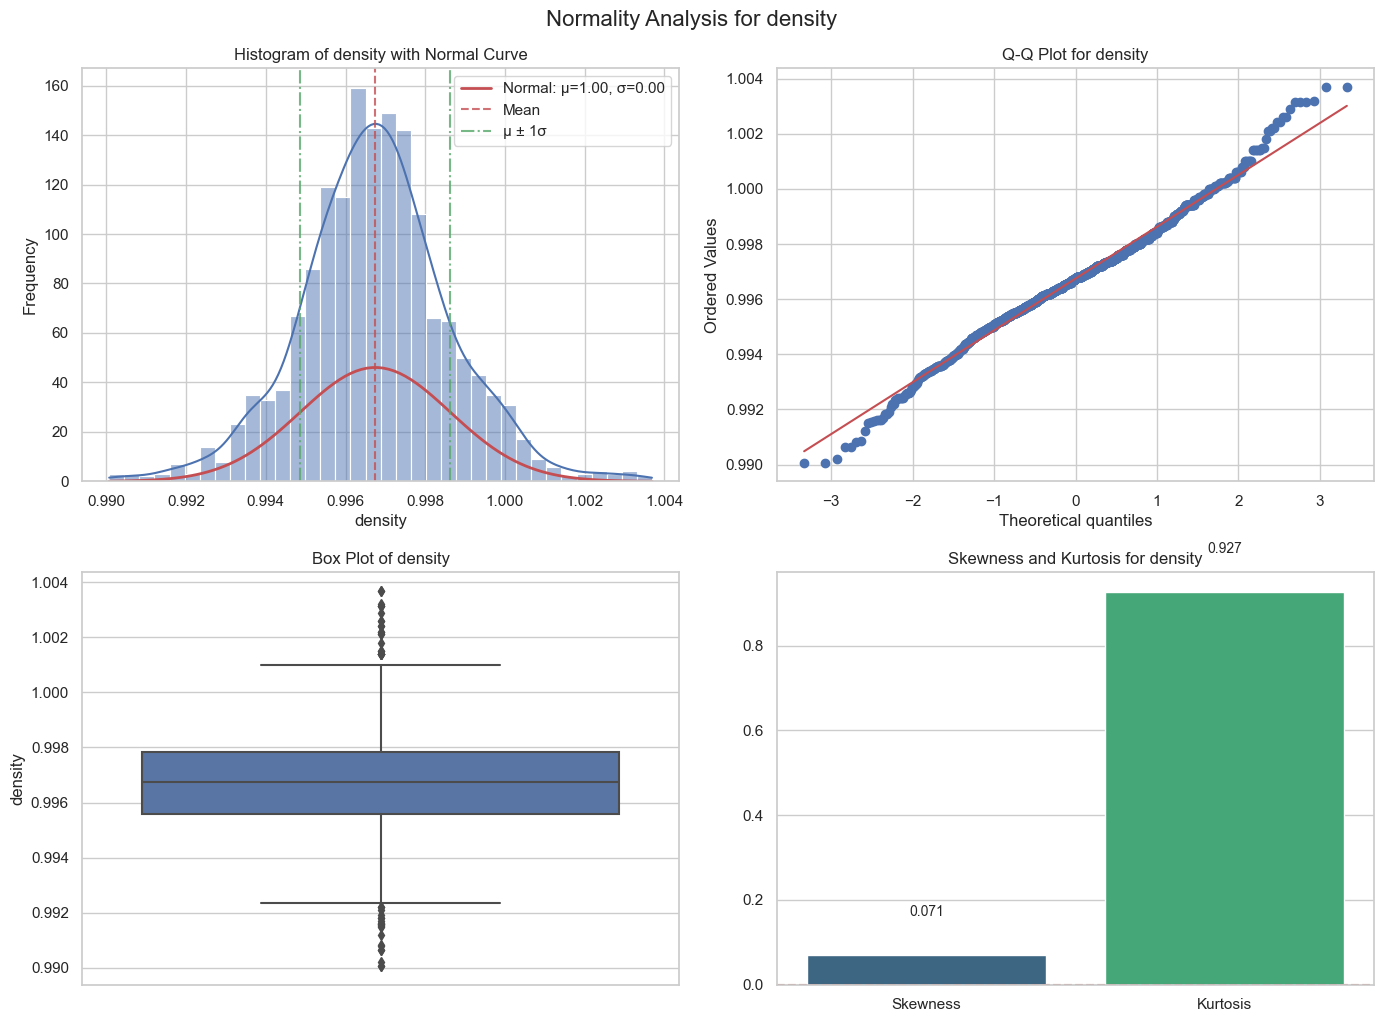


Normality Tests for density:
Shapiro-Wilk Test: statistic=0.9909, p-value=0.000000
Interpretation (p << 0.05): Reject H0: Data is NOT normally distributed
Note that.. H₀: The data follows a normal distribution
 
Anderson-Darling Test: statistic=3.8676
Critical values at significance levels:
  15%: 0.5750 - Reject H0: Data is NOT normally distributed
  10%: 0.6540 - Reject H0: Data is NOT normally distributed
  5%: 0.7850 - Reject H0: Data is NOT normally distributed
  2.5%: 0.9160 - Reject H0: Data is NOT normally distributed
  1%: 1.0890 - Reject H0: Data is NOT normally distributed
Note that for Anderson-Darling test - If test statistic > critical value: Reject H₀ (data is NOT normal)
 

Skewness: 0.0712
  The distribution is approximately symmetric
Note that ...
Skewness = 0: Perfectly symmetric distribution 
 Skewness > 0: Right-skewed (positive skew) - the right tail is longer 
 Skewness < 0: Left-skewed (negative skew) - the left tail is longer
 In our code, we set a limit of 0.

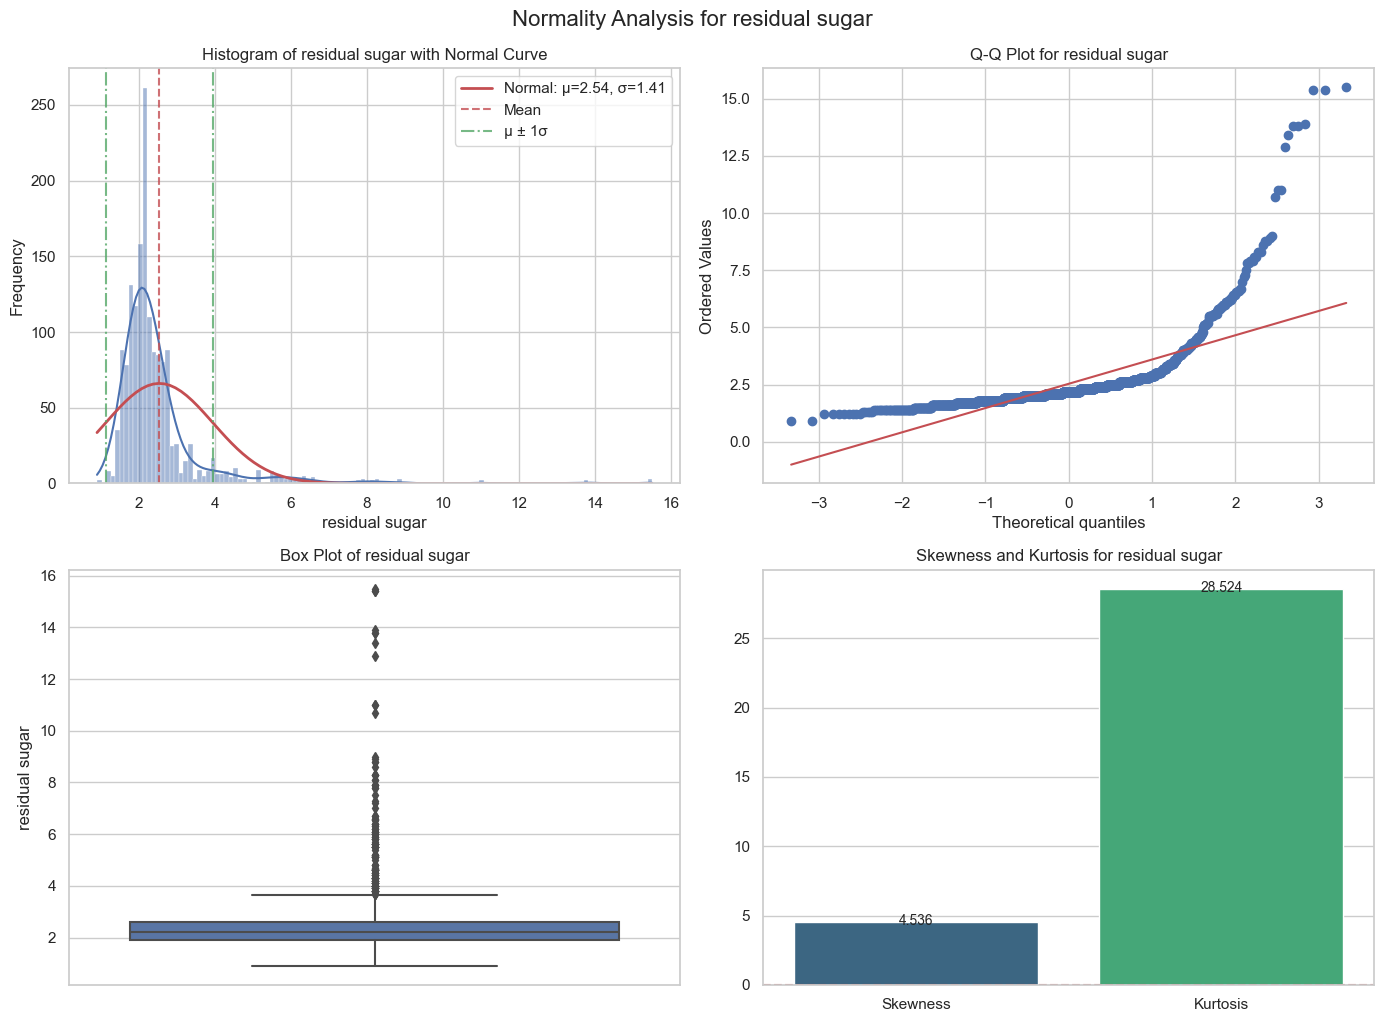


Normality Tests for residual sugar:
Shapiro-Wilk Test: statistic=0.5661, p-value=0.000000
Interpretation (p << 0.05): Reject H0: Data is NOT normally distributed
Note that.. H₀: The data follows a normal distribution
 
Anderson-Darling Test: statistic=188.0644
Critical values at significance levels:
  15%: 0.5750 - Reject H0: Data is NOT normally distributed
  10%: 0.6540 - Reject H0: Data is NOT normally distributed
  5%: 0.7850 - Reject H0: Data is NOT normally distributed
  2.5%: 0.9160 - Reject H0: Data is NOT normally distributed
  1%: 1.0890 - Reject H0: Data is NOT normally distributed
Note that for Anderson-Darling test - If test statistic > critical value: Reject H₀ (data is NOT normal)
 

Skewness: 4.5364
  The distribution is positively skewed (right-tailed)
Note that ...
Skewness = 0: Perfectly symmetric distribution 
 Skewness > 0: Right-skewed (positive skew) - the right tail is longer 
 Skewness < 0: Left-skewed (negative skew) - the left tail is longer
 In our code, we

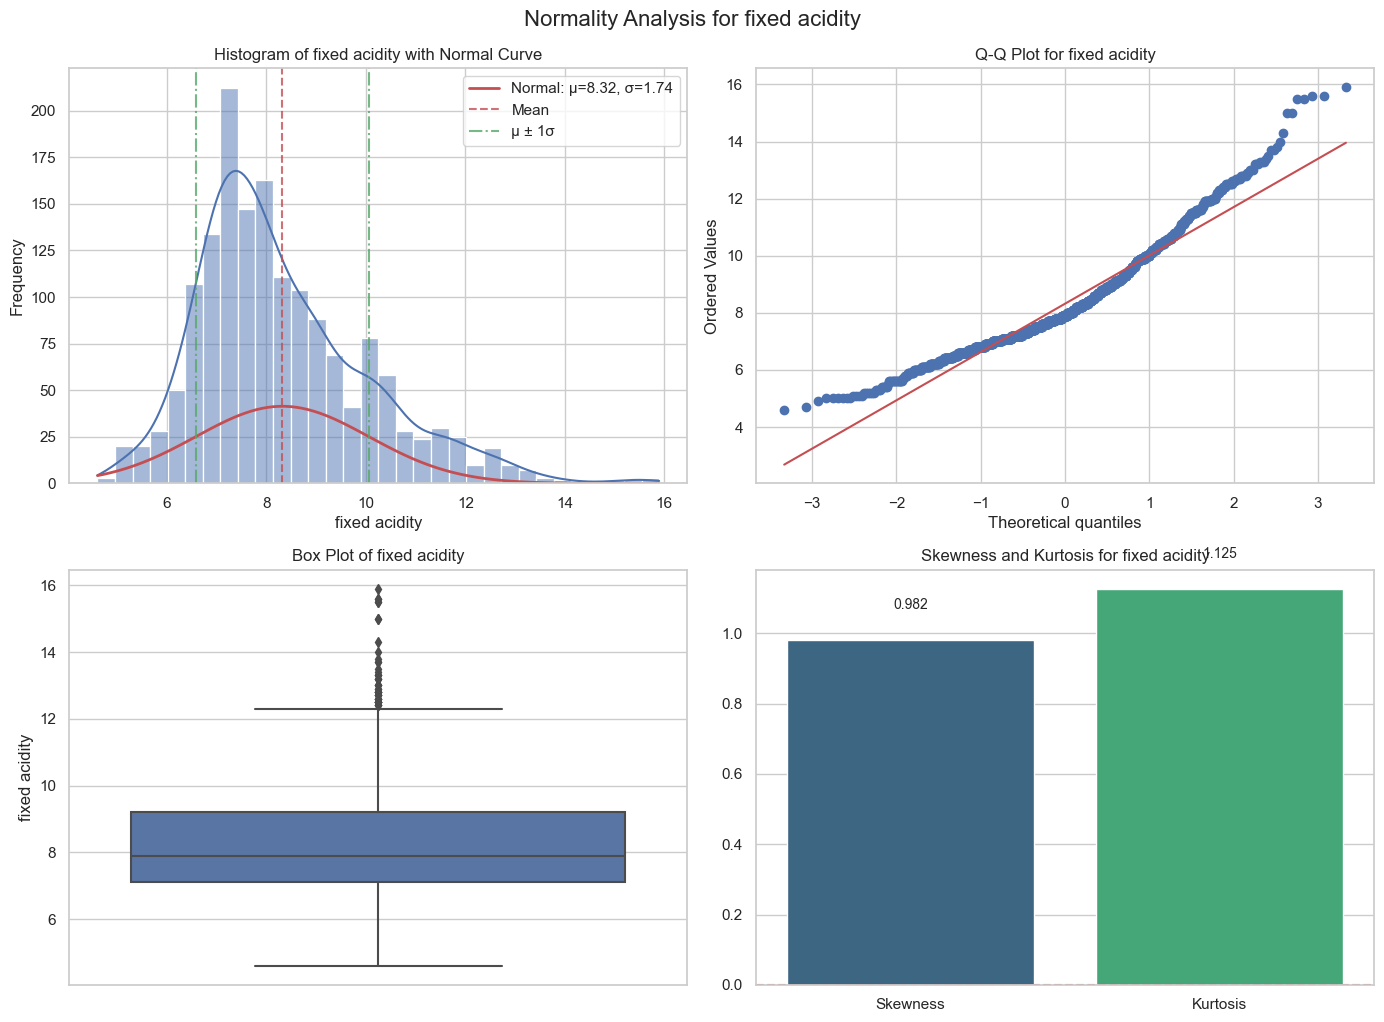


Normality Tests for fixed acidity:
Shapiro-Wilk Test: statistic=0.9420, p-value=0.000000
Interpretation (p << 0.05): Reject H0: Data is NOT normally distributed
Note that.. H₀: The data follows a normal distribution
 
Anderson-Darling Test: statistic=28.1430
Critical values at significance levels:
  15%: 0.5750 - Reject H0: Data is NOT normally distributed
  10%: 0.6540 - Reject H0: Data is NOT normally distributed
  5%: 0.7850 - Reject H0: Data is NOT normally distributed
  2.5%: 0.9160 - Reject H0: Data is NOT normally distributed
  1%: 1.0890 - Reject H0: Data is NOT normally distributed
Note that for Anderson-Darling test - If test statistic > critical value: Reject H₀ (data is NOT normal)
 

Skewness: 0.9818
  The distribution is positively skewed (right-tailed)
Note that ...
Skewness = 0: Perfectly symmetric distribution 
 Skewness > 0: Right-skewed (positive skew) - the right tail is longer 
 Skewness < 0: Left-skewed (negative skew) - the left tail is longer
 In our code, we s

In [8]:
# Select a few columns to analyze
columns_to_analyze = ['alcohol', 'pH', 'density', 'residual sugar', 'fixed acidity']

# Function to check normality
def check_normality(data, column):
    """Check if data follows a normal distribution with visualizations and statistical tests."""
    values = data[column]

    # Create a figure for plots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    # Plot 1: Histogram with normal curve
    ax1 = axes[0, 0]
    sns.histplot(values, kde=True, ax=ax1)

    # Fit a normal distribution to the data and overlay it
    mu, std = stats.norm.fit(values)
    x = np.linspace(min(values), max(values), 100)
    p = stats.norm.pdf(x, mu, std)
    ax1.plot(x, p * len(values) * (max(values) - min(values)) / 100,
            'r-', linewidth=2, label=f'Normal: μ={mu:.2f}, σ={std:.2f}')

    ax1.axvline(mu, color='r', linestyle='--', alpha=0.8, label='Mean')
    ax1.axvline(mu + std, color='g', linestyle='-.', alpha=0.8, label='μ ± 1σ')
    ax1.axvline(mu - std, color='g', linestyle='-.', alpha=0.8)

    ax1.set_title(f'Histogram of {column} with Normal Curve')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Plot 2: QQ plot
    ax2 = axes[0, 1]
    stats.probplot(values, dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot for {column}')

    # Plot 3: Box plot
    ax3 = axes[1, 0]
    sns.boxplot(y=values, ax=ax3)
    ax3.set_title(f'Box Plot of {column}')
    ax3.set_ylabel(column)

    # Plot 4: Skewness and Kurtosis visualization
    ax4 = axes[1, 1]

    # Calculate skewness and kurtosis
    skewness = stats.skew(values)
    kurtosis = stats.kurtosis(values)

    # Create a labeled bar chart
    metrics = ['Skewness', 'Kurtosis']
    values_metrics = [skewness, kurtosis]

    sns.barplot(x=metrics, y=values_metrics, palette='viridis', ax=ax4)
    ax4.axhline(y=0, color='r', linestyle='--')
    ax4.set_title(f'Skewness and Kurtosis for {column}')

    # Add text annotations on bars
    for i, v in enumerate(values_metrics):
        ax4.text(i, v + 0.1 if v >= 0 else v - 0.2, f'{v:.3f}',
                ha='center', va='center', fontsize=10)

    plt.tight_layout()
    plt.suptitle(f'Normality Analysis for {column}', fontsize=16, y=1.02)
    plt.show()

    # Perform statistical tests for normality
    print(f"\nNormality Tests for {column}:")

    # Shapiro-Wilk test - best for sample sizes < 2000
    stat_shapiro, p_shapiro = stats.shapiro(values)
    print(f"Shapiro-Wilk Test: statistic={stat_shapiro:.4f}, p-value={p_shapiro:.6f}")
    if p_shapiro < 0.05:
        result_shapiro = "Reject H0: Data is NOT normally distributed"
    else:
        result_shapiro = "Fail to reject H0: Data looks normally distributed"
    print(f"Interpretation (p << 0.05): {result_shapiro}")
    print("Note that.. H₀: The data follows a normal distribution")
    print(" ")

    # Anderson-Darling test
    result_ad = stats.anderson(values, dist='norm')
    print(f"Anderson-Darling Test: statistic={result_ad.statistic:.4f}")
    print("Critical values at significance levels:")
    for i, significance in enumerate(result_ad.critical_values):
        sig_level = [15, 10, 5, 2.5, 1][i]
        if result_ad.statistic > significance:
            result_ad_i = "Reject H0: Data is NOT normally distributed"
        else:
            result_ad_i = "Fail to reject H0: Data looks normally distributed"
        print(f"  {sig_level}%: {significance:.4f} - {result_ad_i}")

    print("Note that for Anderson-Darling test - If test statistic > critical value: Reject H₀ (data is NOT normal)")
    print(" ")

    # Calculate and print skewness and kurtosis
    print(f"\nSkewness: {skewness:.4f}")
    if abs(skewness) < 0.5:
        print("  The distribution is approximately symmetric")
    elif skewness < -0.5:
        print("  The distribution is negatively skewed (left-tailed)")
    else:  # skewness > 0.5
        print("  The distribution is positively skewed (right-tailed)")
    print("Note that ...")
    print("Skewness = 0: Perfectly symmetric distribution \n Skewness > 0: Right-skewed (positive skew) - the right tail is longer \n Skewness < 0: Left-skewed (negative skew) - the left tail is longer")
    print(" In our code, we set a limit of 0.5. So if the skewness < 0.5, we say that the distribution is approximately symmetric")
    print(" ")
    print(f"Kurtosis: {kurtosis:.4f}")
    if abs(kurtosis) < 0.5:
        print("  The distribution has kurtosis similar to normal distribution (mesokurtic)")
    elif kurtosis < -0.5:
        print("  The distribution has lighter tails than normal (platykurtic)")
    else:  # kurtosis > 0.5
        print("  The distribution has heavier tails than normal (leptokurtic)")
    print("Note that ...")
    print("Kurtosis = 0: Same tailedness as a normal distribution (mesokurtic) \n Kurtosis > 0: Heavier tails than normal (leptokurtic) - more outliers \n Kurtosis < 0: Lighter tails than normal (platykurtic) - fewer outliers")
    print(" In our code, we set a limit of 0.5. So if kurtosis < 0.5, we say that he distribution has kurtosis similar to normal distribution (mesokurtic)")
    print(" ")



# Apply normality tests to selected columns
for column in columns_to_analyze:
    check_normality(wine_data, column)

# 2. Non-Normal Distributions

Let us plot a synthetic normally distributed plots to learn about the shapes of a few non-normal distributions before plotting the attributes from our dataset. <p>

scipy.stats can be used for this purpose. <br>
For example: scipy.stats.uniform.pdf for uniform distribution and scipy.stats.lognorm.pdf for log-normal distribution.<br>
(pdf stands for probability density function)

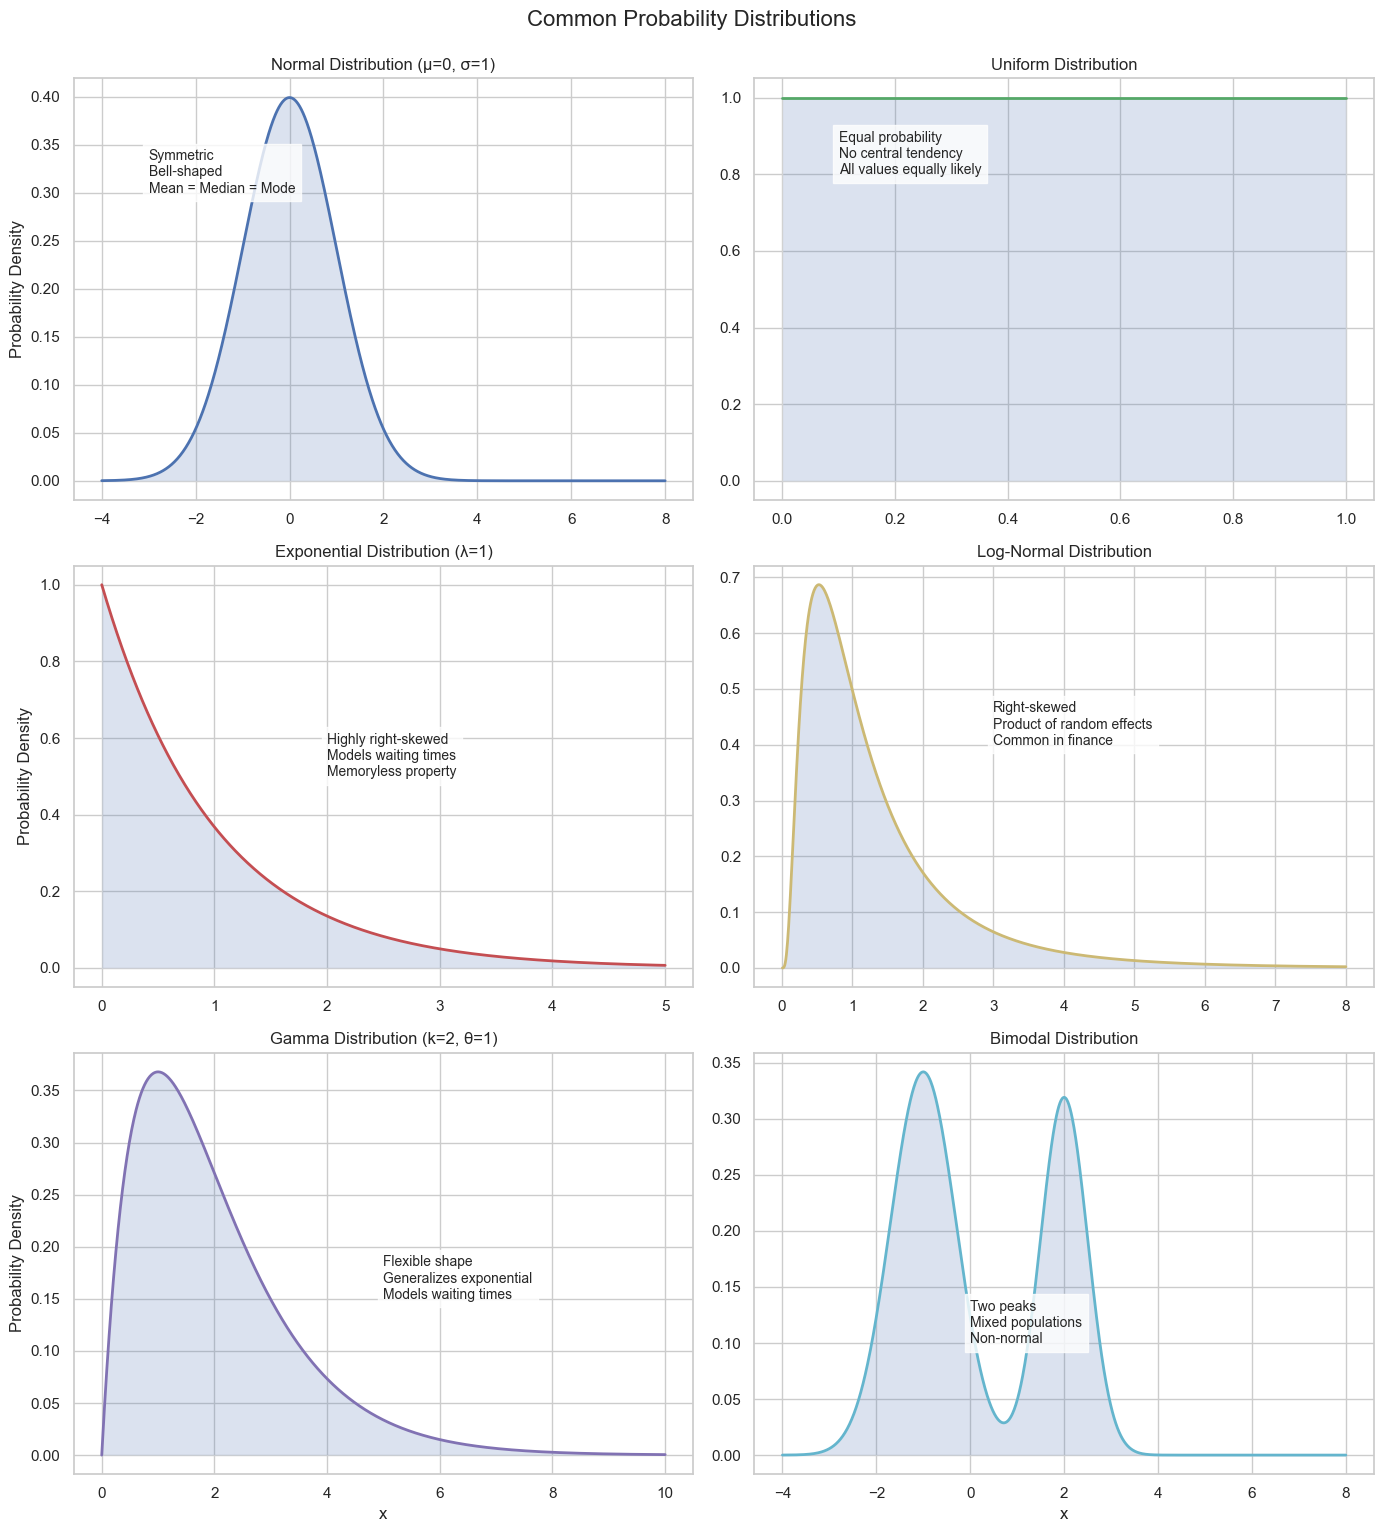


Common Non-Normal Distributions:

1. Uniform Distribution:
   - All values within a range are equally likely
   - No central tendency
   - Examples: Random number generators, rounding errors

2. Exponential Distribution:
   - Models time between events that occur at a constant rate
   - Highly right-skewed
   - Examples: Waiting times, equipment failure rates

3. Log-Normal Distribution:
   - Result when variables are multiplied together (multiplicative effects)
   - Always right-skewed, only positive values
   - Examples: Income distributions, stock prices, biological growth

4. Gamma Distribution:
   - Generalizes the exponential, flexible shape
   - Models waiting times for multiple events
   - Examples: Rainfall amounts, insurance claims

5. Bimodal/Multimodal Distributions:
   - Two or more peaks
   - Usually indicates mixed populations or processes
   - Examples: Height distribution for men and women combined


In [9]:

def plot_common_distributions():
    """Plot and explain common non-normal distributions."""
    # Create a figure
    fig, axes = plt.subplots(3, 2, figsize=(14, 15))

    # Distributions to plot
    x = np.linspace(-4, 8, 1000)
    x_uni = np.linspace(0, 1, 1000)
    x_exp = np.linspace(0, 5, 1000)
    x_gamma = np.linspace(0, 10, 1000)
    x_lognorm = np.linspace(0.01, 8, 1000)

    # 1. Normal Distribution (for reference)
    normal = stats.norm.pdf(x, 0, 1)
    axes[0, 0].plot(x, normal, 'b-', linewidth=2)
    axes[0, 0].fill_between(x, normal, alpha=0.2)
    axes[0, 0].set_title('Normal Distribution (μ=0, σ=1)')
    axes[0, 0].set_ylabel('Probability Density')
    axes[0, 0].text(-3, 0.3, 'Symmetric\nBell-shaped\nMean = Median = Mode',
                    fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    # 2. Uniform Distribution
    uniform = stats.uniform.pdf(x_uni, 0, 1)
    axes[0, 1].plot(x_uni, uniform, 'g-', linewidth=2)
    axes[0, 1].fill_between(x_uni, uniform, alpha=0.2)
    axes[0, 1].set_title('Uniform Distribution')
    axes[0, 1].text(0.1, 0.8, 'Equal probability\nNo central tendency\nAll values equally likely',
                   fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    # 3. Exponential Distribution
    exponential = stats.expon.pdf(x_exp, scale=1)
    axes[1, 0].plot(x_exp, exponential, 'r-', linewidth=2)
    axes[1, 0].fill_between(x_exp, exponential, alpha=0.2)
    axes[1, 0].set_title('Exponential Distribution (λ=1)')
    axes[1, 0].set_ylabel('Probability Density')
    axes[1, 0].text(2, 0.5, 'Highly right-skewed\nModels waiting times\nMemoryless property',
                   fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    # 4. Log-Normal Distribution
    lognormal = stats.lognorm.pdf(x_lognorm, s=0.8, scale=1)
    axes[1, 1].plot(x_lognorm, lognormal, 'y-', linewidth=2)
    axes[1, 1].fill_between(x_lognorm, lognormal, alpha=0.2)
    axes[1, 1].set_title('Log-Normal Distribution')
    axes[1, 1].text(3, 0.4, 'Right-skewed\nProduct of random effects\nCommon in finance',
                   fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    # 5. Gamma Distribution
    gamma = stats.gamma.pdf(x_gamma, a=2, scale=1)
    axes[2, 0].plot(x_gamma, gamma, 'm-', linewidth=2)
    axes[2, 0].fill_between(x_gamma, gamma, alpha=0.2)
    axes[2, 0].set_title('Gamma Distribution (k=2, θ=1)')
    axes[2, 0].set_xlabel('x')
    axes[2, 0].set_ylabel('Probability Density')
    axes[2, 0].text(5, 0.15, 'Flexible shape\nGeneralizes exponential\nModels waiting times',
                   fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    # 6. Bimodal Distribution (mixture of two normals)
    bimodal = 0.6 * stats.norm.pdf(x, -1, 0.7) + 0.4 * stats.norm.pdf(x, 2, 0.5)
    axes[2, 1].plot(x, bimodal, 'c-', linewidth=2)
    axes[2, 1].fill_between(x, bimodal, alpha=0.2)
    axes[2, 1].set_title('Bimodal Distribution')
    axes[2, 1].set_xlabel('x')
    axes[2, 1].text(0, 0.1, 'Two peaks\nMixed populations\nNon-normal',
                   fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.suptitle('Common Probability Distributions', fontsize=16, y=1.02)
    plt.show()

    # Provide explanations
    print("\nCommon Non-Normal Distributions:")
    print("\n1. Uniform Distribution:")
    print("   - All values within a range are equally likely")
    print("   - No central tendency")
    print("   - Examples: Random number generators, rounding errors")

    print("\n2. Exponential Distribution:")
    print("   - Models time between events that occur at a constant rate")
    print("   - Highly right-skewed")
    print("   - Examples: Waiting times, equipment failure rates")

    print("\n3. Log-Normal Distribution:")
    print("   - Result when variables are multiplied together (multiplicative effects)")
    print("   - Always right-skewed, only positive values")
    print("   - Examples: Income distributions, stock prices, biological growth")

    print("\n4. Gamma Distribution:")
    print("   - Generalizes the exponential, flexible shape")
    print("   - Models waiting times for multiple events")
    print("   - Examples: Rainfall amounts, insurance claims")

    print("\n5. Bimodal/Multimodal Distributions:")
    print("   - Two or more peaks")
    print("   - Usually indicates mixed populations or processes")
    print("   - Examples: Height distribution for men and women combined")

# Plot common distributions
plot_common_distributions()

Now, let us find non-normal distributions in our dataset by calculating skewness and kurtosis for all attributes and pick the top ones to print and plot. Let us pick two attributes (columns) each with high skewness and kurtosis, four in total unless we don't have columns that meet one of these criteria or if the second two are the same attributes and the first. <br>



Examples of Non-Normal Distributions in Wine Dataset:

Columns with High Skewness:
chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
dtype: float64


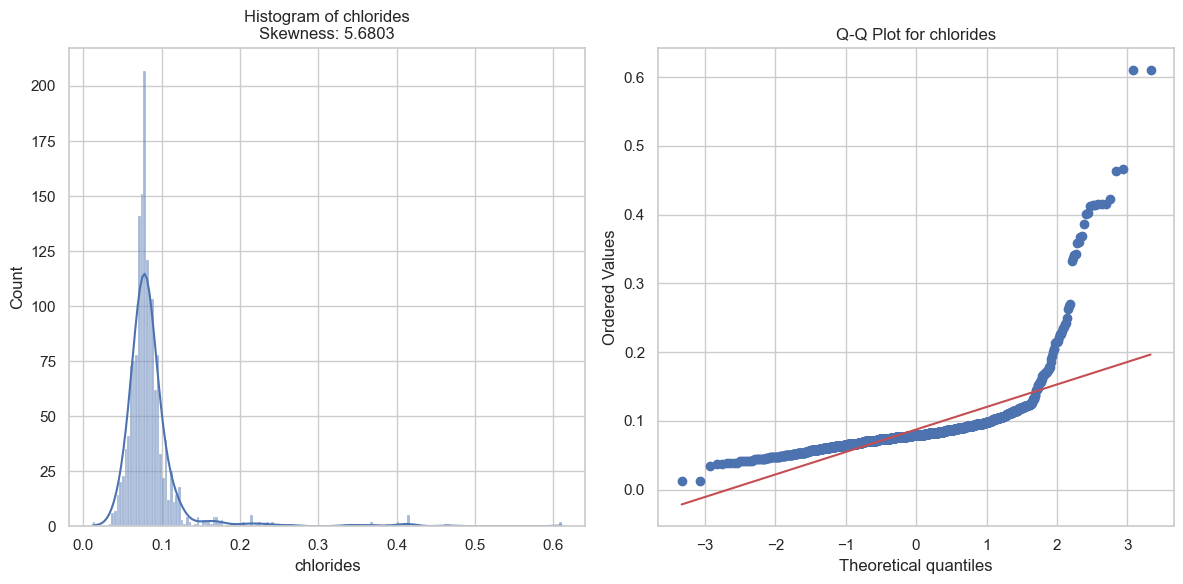


chlorides has a skewness of 5.6803
This indicates a right-skewed distribution with a long right tail.
Most values are concentrated on the left with a few high outliers.


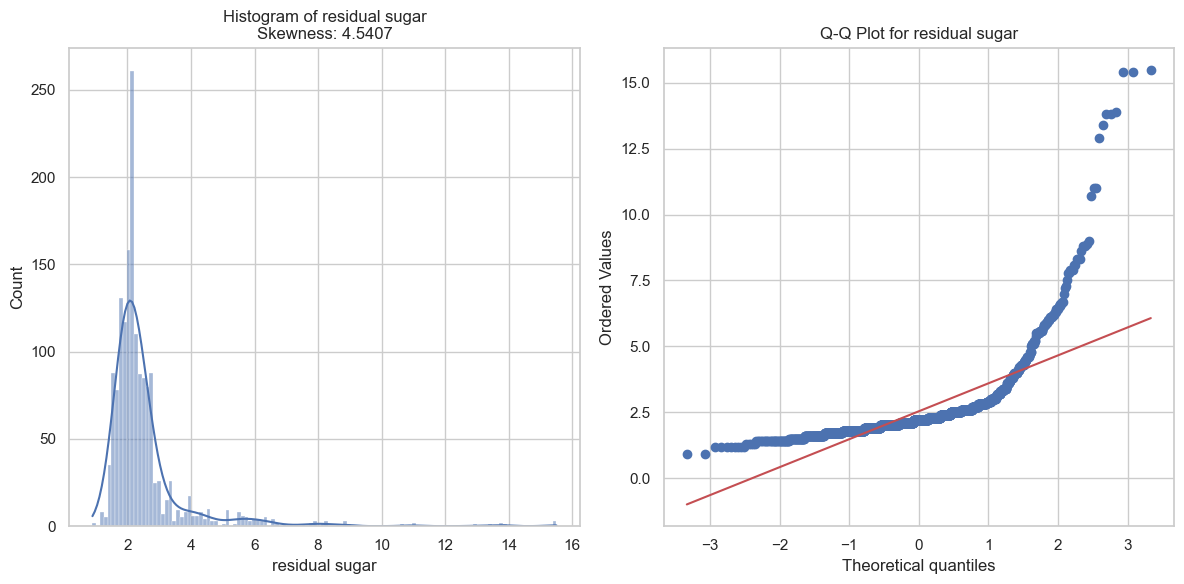


residual sugar has a skewness of 4.5407
This indicates a right-skewed distribution with a long right tail.
Most values are concentrated on the left with a few high outliers.

Columns with High Kurtosis:
chlorides               41.715787
residual sugar          28.617595
sulphates               11.720251
total sulfur dioxide     3.809824
free sulfur dioxide      2.023562
dtype: float64


In [10]:

def find_non_normal_examples():
    """Find and display examples of non-normal distributions in the dataset."""
    print("\nExamples of Non-Normal Distributions in Wine Dataset:")

    # Find columns with high skewness or kurtosis
    skewness = wine_data.skew()
    kurtosis = wine_data.kurtosis()

    # Select columns with high skewness (absolute value > 1)
    high_skew_cols = skewness[abs(skewness) > 1].sort_values(ascending=False)

    if not high_skew_cols.empty:
        print("\nColumns with High Skewness:")
        print(high_skew_cols)

        # Take the top 2 skewed columns
        top_skewed = high_skew_cols.index[:2]

        # Visualize these columns
        for col in top_skewed:
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            sns.histplot(wine_data[col], kde=True)
            plt.title(f'Histogram of {col}\nSkewness: {skewness[col]:.4f}')

            plt.subplot(1, 2, 2)
            stats.probplot(wine_data[col], dist="norm", plot=plt)
            plt.title(f'Q-Q Plot for {col}')

            plt.tight_layout()
            plt.show()

            print(f"\n{col} has a skewness of {skewness[col]:.4f}")
            if skewness[col] > 0:
                print(f"This indicates a right-skewed distribution with a long right tail.")
                print(f"Most values are concentrated on the left with a few high outliers.")
            else:
                print(f"This indicates a left-skewed distribution with a long left tail.")
                print(f"Most values are concentrated on the right with a few low outliers.")

    # Select columns with high kurtosis (absolute value > 2)
    high_kurt_cols = kurtosis[abs(kurtosis) > 2].sort_values(ascending=False)

    if not high_kurt_cols.empty:
        print("\nColumns with High Kurtosis:")
        print(high_kurt_cols)

        # Take the top 2 columns with high kurtosis
        top_kurt = high_kurt_cols.index[:2]

        # Visualize these columns
        for col in top_kurt:
            if col not in top_skewed:  # Avoid repeating columns already shown
                plt.figure(figsize=(12, 6))

                plt.subplot(1, 2, 1)
                sns.histplot(wine_data[col], kde=True)
                plt.title(f'Histogram of {col}\nKurtosis: {kurtosis[col]:.4f}')

                plt.subplot(1, 2, 2)
                stats.probplot(wine_data[col], dist="norm", plot=plt)
                plt.title(f'Q-Q Plot for {col}')

                plt.tight_layout()
                plt.show()

                print(f"\n{col} has a kurtosis of {kurtosis[col]:.4f}")
                if kurtosis[col] > 0:
                    print(f"This indicates a leptokurtic distribution with heavier tails.")
                    print(f"The distribution has more outliers than a normal distribution.")
                else:
                    print(f"This indicates a platykurtic distribution with lighter tails.")
                    print(f"The distribution has fewer outliers than a normal distribution.")

# Find examples of non-normal distributions
find_non_normal_examples()

# 3. Data Transformation Techniques

Let us apply various data transformations to our highly skewed attribute (Chlorides).

Data Transformation Techniques:
When data doesn't follow a normal distribution, transformations can help normalize it.
Common transformations include:

1. Log Transformation:
   - Apply: log(x) or log(x+c) where c is a constant to avoid log(0)
   - Best for: Right-skewed data, data spanning multiple orders of magnitude
   - Examples: Income, prices, microbial counts

2. Square Root Transformation:
   - Apply: sqrt(x) or sqrt(x+c)
   - Best for: Right-skewed data, count data
   - Examples: Count data, light to moderate skewness

3. Reciprocal Transformation:
   - Apply: 1/x or 1/(x+c)
   - Best for: Right-skewed data with all positive values
   - Examples: Time to complete a task, rates

4. Box-Cox Transformation:
   - Apply: Automatic optimal power transformation
   - Best for: Finding the optimal transformation automatically
   - Examples: General-purpose transformation for many types of data
   - Box-Cox lambda value for chlorides: -0.4575
   - Lambda ≈ 0 suggests log transformation 

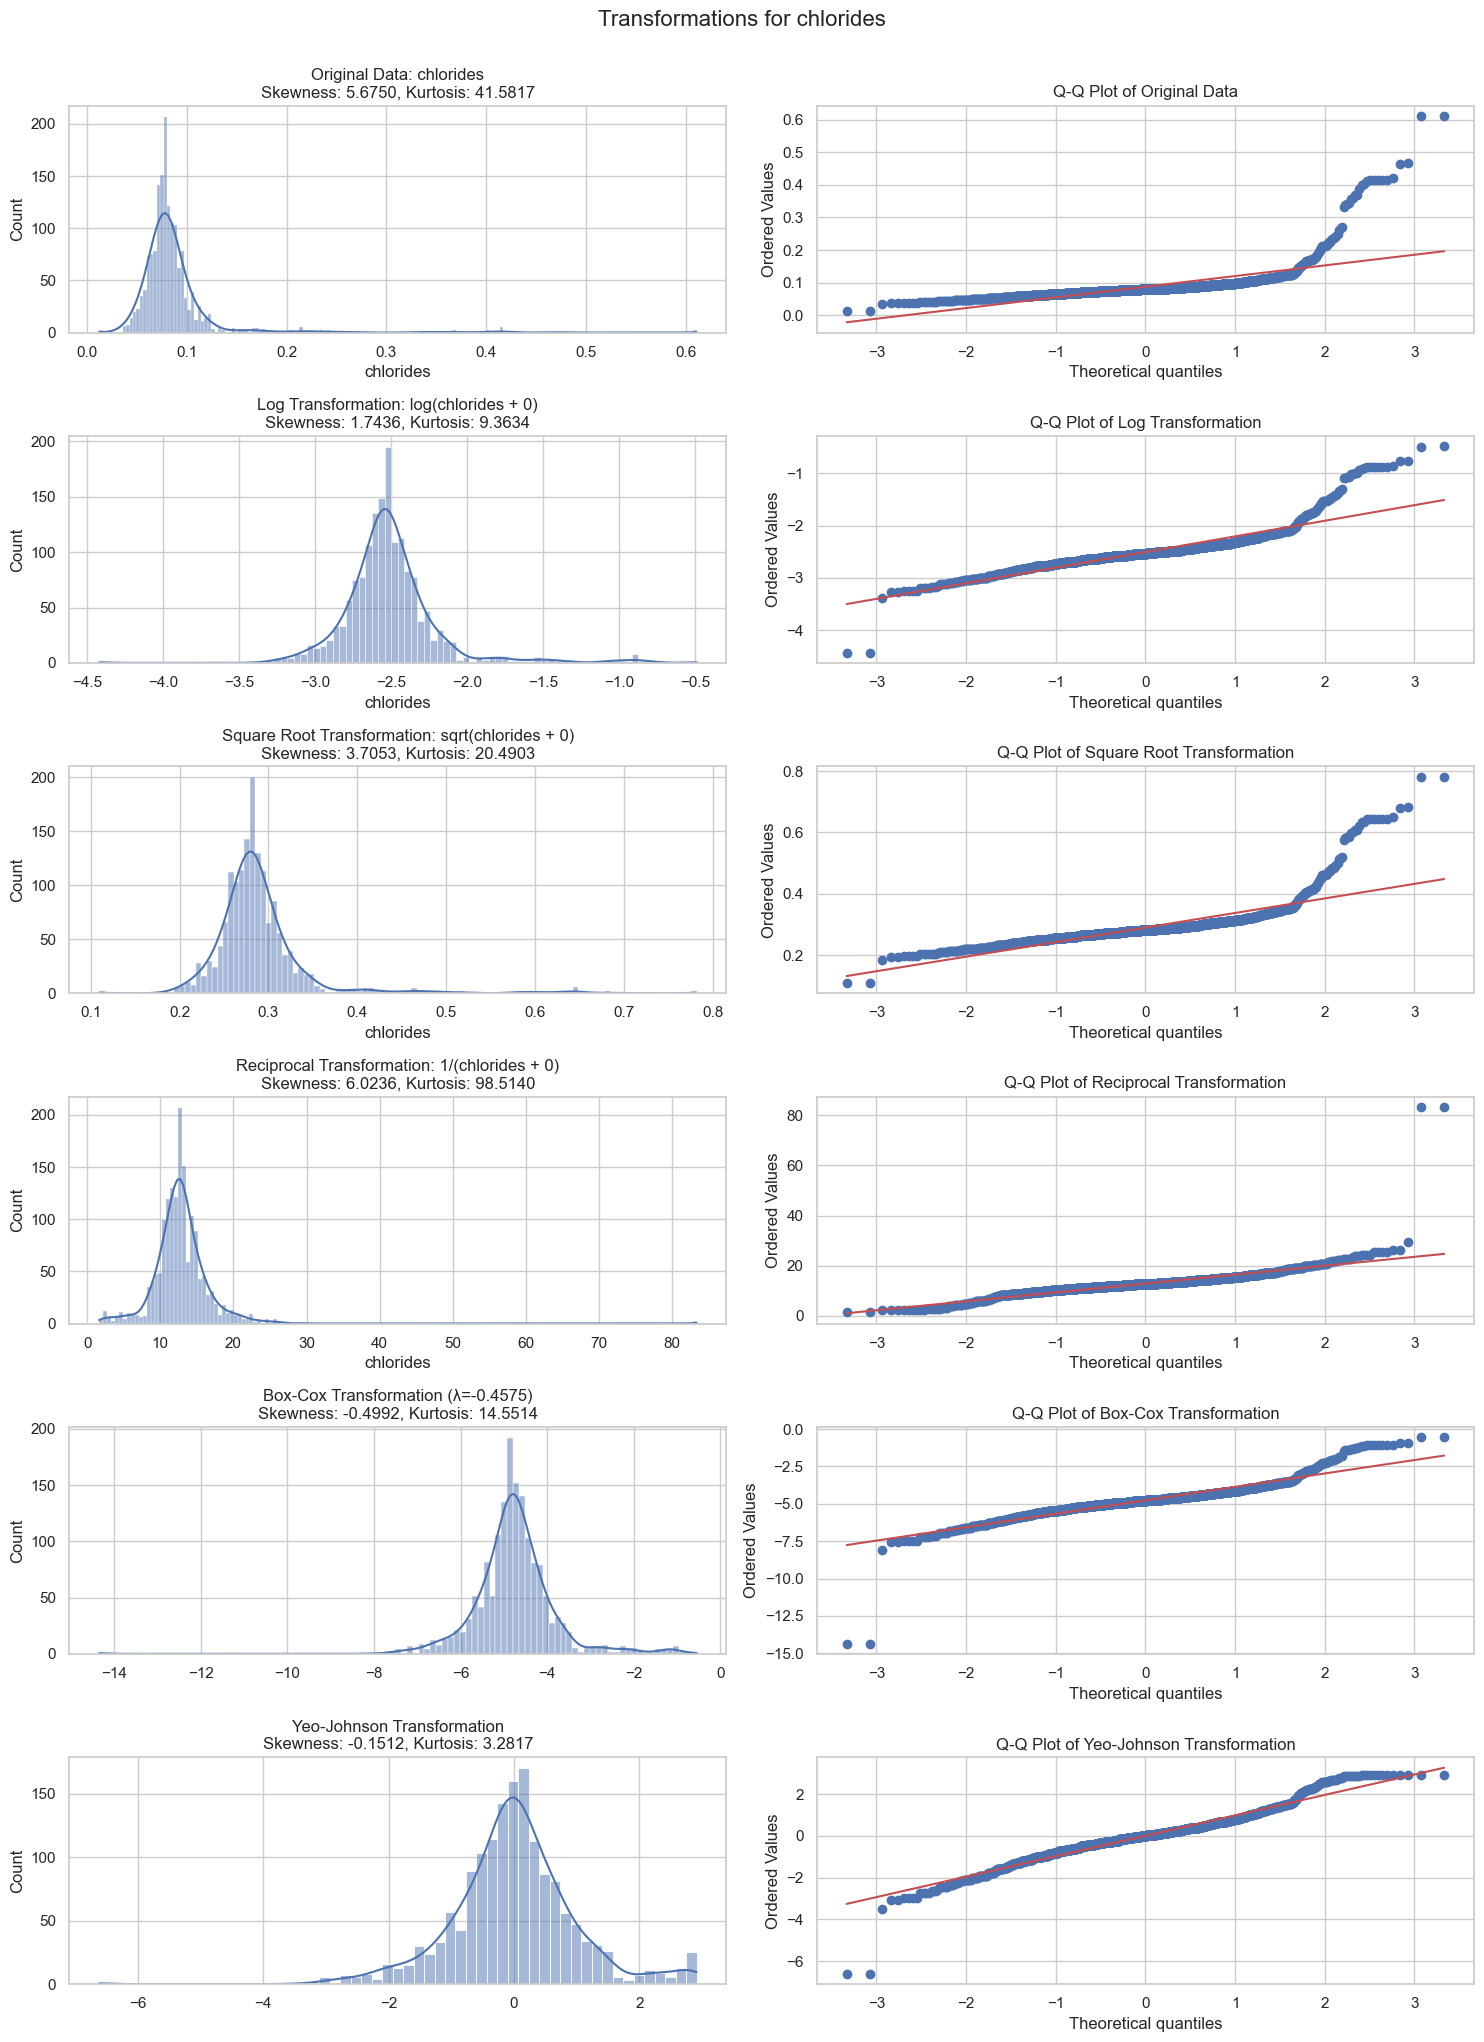


Summary of Transformations for chlorides
  Transformation  Skewness   Kurtosis
0       Original  5.675017  41.581708
1            Log  1.743578   9.363412
2    Square Root  3.705309  20.490293
3     Reciprocal  6.023601  98.514038
4        Box-Cox -0.499174  14.551370
5    Yeo-Johnson -0.151162   3.281694

Best transformation for normalizing chlorides: Yeo-Johnson
Reduced skewness from 5.6750 to -0.1512


In [11]:
def demonstrate_transformations():
    """Demonstrate various data transformation techniques."""
    print("Data Transformation Techniques:")
    print("When data doesn't follow a normal distribution, transformations can help normalize it.")
    print("Common transformations include:")

    # Select a highly skewed column
    skewness = wine_data.skew()
    most_skewed_col = skewness.abs().sort_values(ascending=False).index[0]

    # Original data
    data_orig = wine_data[most_skewed_col].copy()
    skew_orig = stats.skew(data_orig)
    kurt_orig = stats.kurtosis(data_orig)

    plt.figure(figsize=(15, 20))

    # Original data plot
    plt.subplot(6, 2, 1)
    sns.histplot(data_orig, kde=True)
    plt.title(f'Original Data: {most_skewed_col}\nSkewness: {skew_orig:.4f}, Kurtosis: {kurt_orig:.4f}')

    plt.subplot(6, 2, 2)
    stats.probplot(data_orig, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Original Data')

    # 1. Log Transformation (log(x))
    print("\n1. Log Transformation:")
    print("   - Apply: log(x) or log(x+c) where c is a constant to avoid log(0)")
    print("   - Best for: Right-skewed data, data spanning multiple orders of magnitude")
    print("   - Examples: Income, prices, microbial counts")

    # Apply log transformation (add a constant if min value is 0)
    min_val = data_orig.min()
    c = 1 if min_val <= 0 else 0
    data_log = np.log(data_orig + c)
    skew_log = stats.skew(data_log)
    kurt_log = stats.kurtosis(data_log)

    plt.subplot(6, 2, 3)
    sns.histplot(data_log, kde=True)
    plt.title(f'Log Transformation: log({most_skewed_col} + {c})\nSkewness: {skew_log:.4f}, Kurtosis: {kurt_log:.4f}')

    plt.subplot(6, 2, 4)
    stats.probplot(data_log, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Log Transformation')

    # 2. Square Root Transformation (sqrt(x))
    print("\n2. Square Root Transformation:")
    print("   - Apply: sqrt(x) or sqrt(x+c)")
    print("   - Best for: Right-skewed data, count data")
    print("   - Examples: Count data, light to moderate skewness")

    # Apply square root transformation
    data_sqrt = np.sqrt(data_orig + c)
    skew_sqrt = stats.skew(data_sqrt)
    kurt_sqrt = stats.kurtosis(data_sqrt)

    plt.subplot(6, 2, 5)
    sns.histplot(data_sqrt, kde=True)
    plt.title(f'Square Root Transformation: sqrt({most_skewed_col} + {c})\nSkewness: {skew_sqrt:.4f}, Kurtosis: {kurt_sqrt:.4f}')

    plt.subplot(6, 2, 6)
    stats.probplot(data_sqrt, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Square Root Transformation')

    # 3. Reciprocal Transformation (1/x)
    print("\n3. Reciprocal Transformation:")
    print("   - Apply: 1/x or 1/(x+c)")
    print("   - Best for: Right-skewed data with all positive values")
    print("   - Examples: Time to complete a task, rates")

    # Apply reciprocal transformation (avoid division by zero)
    data_recip = 1 / (data_orig + c)
    skew_recip = stats.skew(data_recip)
    kurt_recip = stats.kurtosis(data_recip)

    plt.subplot(6, 2, 7)
    sns.histplot(data_recip, kde=True)
    plt.title(f'Reciprocal Transformation: 1/({most_skewed_col} + {c})\nSkewness: {skew_recip:.4f}, Kurtosis: {kurt_recip:.4f}')

    plt.subplot(6, 2, 8)
    stats.probplot(data_recip, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Reciprocal Transformation')

    # 4. Box-Cox Transformation
    print("\n4. Box-Cox Transformation:")
    print("   - Apply: Automatic optimal power transformation")
    print("   - Best for: Finding the optimal transformation automatically")
    print("   - Examples: General-purpose transformation for many types of data")

    # Apply Box-Cox transformation
    # Box-Cox requires all values to be positive
    if min_val <= 0:
        data_for_boxcox = data_orig - min_val + 0.01  # Shift and add small constant
    else:
        data_for_boxcox = data_orig

    try:
        data_boxcox, lambda_boxcox = stats.boxcox(data_for_boxcox)
        skew_boxcox = stats.skew(data_boxcox)
        kurt_boxcox = stats.kurtosis(data_boxcox)

        plt.subplot(6, 2, 9)
        sns.histplot(data_boxcox, kde=True)
        plt.title(f'Box-Cox Transformation (λ={lambda_boxcox:.4f})\nSkewness: {skew_boxcox:.4f}, Kurtosis: {kurt_boxcox:.4f}')

        plt.subplot(6, 2, 10)
        stats.probplot(data_boxcox, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of Box-Cox Transformation')

        print(f"   - Box-Cox lambda value for {most_skewed_col}: {lambda_boxcox:.4f}")
        print(f"   - Lambda ≈ 0 suggests log transformation is optimal")
        print(f"   - Lambda ≈ 0.5 suggests square root transformation is optimal")
        print(f"   - Lambda = 1 suggests no transformation needed")
    except:
        print(f"   - Box-Cox transformation could not be applied to {most_skewed_col}")

    # 5. Yeo-Johnson Transformation (similar to Box-Cox but works with negative values)
    print("\n5. Yeo-Johnson Transformation:")
    print("   - Apply: Similar to Box-Cox but works with negative values")
    print("   - Best for: Data with both positive and negative values")
    print("   - Examples: Return rates, temperatures, differences")

    # Apply Yeo-Johnson transformation
    pt = PowerTransformer(method='yeo-johnson')
    data_yj = pt.fit_transform(data_orig.values.reshape(-1, 1)).flatten()
    skew_yj = stats.skew(data_yj)
    kurt_yj = stats.kurtosis(data_yj)

    plt.subplot(6, 2, 11)
    sns.histplot(data_yj, kde=True)
    plt.title(f'Yeo-Johnson Transformation\nSkewness: {skew_yj:.4f}, Kurtosis: {kurt_yj:.4f}')

    plt.subplot(6, 2, 12)
    stats.probplot(data_yj, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Yeo-Johnson Transformation')

    print(f"   - Yeo-Johnson lambda value for {most_skewed_col}: {pt.lambdas_[0]:.4f}")

    plt.tight_layout()
    plt.suptitle(f'Transformations for {most_skewed_col}', fontsize=16, y=1.02)
    plt.show()

    # Summary of transformations
    print("\nSummary of Transformations for", most_skewed_col)
    transformations = ['Original', 'Log', 'Square Root', 'Reciprocal', 'Box-Cox', 'Yeo-Johnson']

    try:
        skewness_values = [skew_orig, skew_log, skew_sqrt, skew_recip, skew_boxcox, skew_yj]
        kurtosis_values = [kurt_orig, kurt_log, kurt_sqrt, kurt_recip, kurt_boxcox, kurt_yj]
    except:
        skewness_values = [skew_orig, skew_log, skew_sqrt, skew_recip, None, skew_yj]
        kurtosis_values = [kurt_orig, kurt_log, kurt_sqrt, kurt_recip, None, kurt_yj]

    summary_df = pd.DataFrame({
        'Transformation': transformations,
        'Skewness': skewness_values,
        'Kurtosis': kurtosis_values
    })
    print(summary_df)

    # Find the transformation with lowest absolute skewness
    valid_indices = [i for i, x in enumerate(skewness_values) if x is not None]
    best_index = valid_indices[np.argmin([abs(skewness_values[i]) for i in valid_indices])]

    print(f"\nBest transformation for normalizing {most_skewed_col}: {transformations[best_index]}")
    print(f"Reduced skewness from {skew_orig:.4f} to {skewness_values[best_index]:.4f}")



# Demonstrate various transformations
demonstrate_transformations()

Guidelines for Choosing Transformations:
1. Log transform: Best for right-skewed data with outliers (e.g., income, reaction times)
2. Square root: Good for count data or moderate right skew (e.g., counts, frequencies)
3. Reciprocal: Reverses order and is useful for rates (e.g., time to complete tasks)
4. Box-Cox: Automatically finds the best power transformation
5. Quantile transform: Forces data into a specific distribution (uniform or normal)

Important Considerations:
- Transformations change the scale of your data and can affect interpretation
- Always document any transformations applied to your data
- Consider whether transforming the data is appropriate for your research question
- Some statistical methods are robust to non-normality and may not require transformation

# 4. Quantile Normal Transformation

- Transforms the data to follow a normal or uniform distribution
- Maps the original data to quantiles of the target distribution
- Works for any continuous distribution, regardless of its shape
- Preserves the rank order of the original data
- Very effective for highly skewed or multimodal distributions

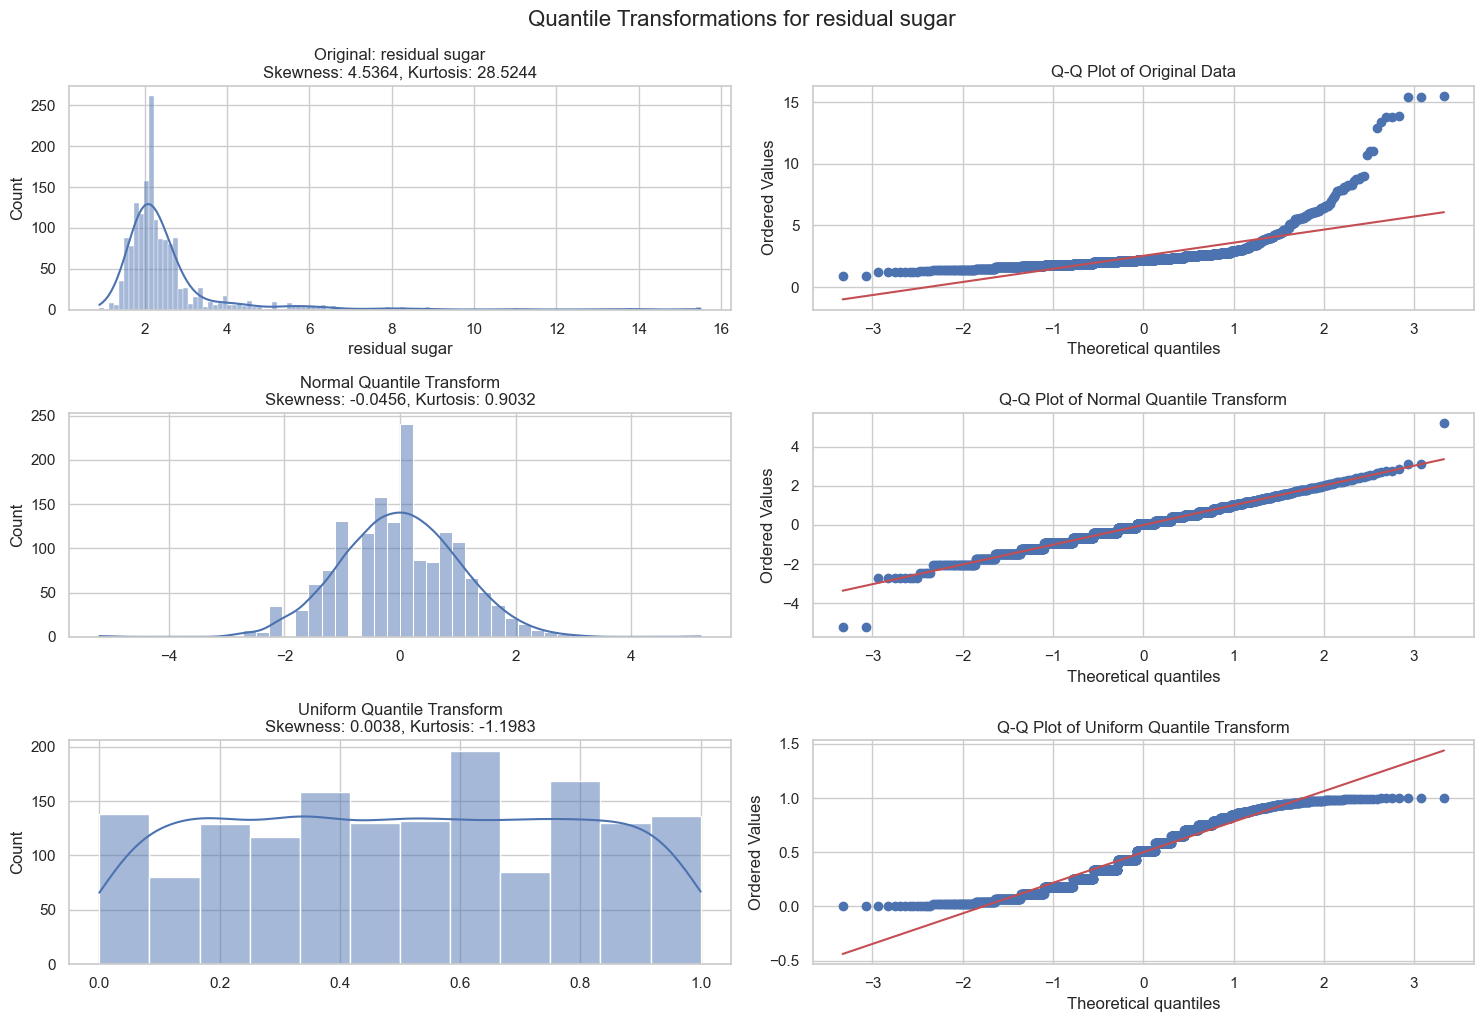


Transformation results for residual sugar:
- Original: Skewness = 4.5364, Kurtosis = 28.5244
- Normal Quantile: Skewness = -0.0456, Kurtosis = 0.9032
- Uniform Quantile: Skewness = 0.0038, Kurtosis = -1.1983


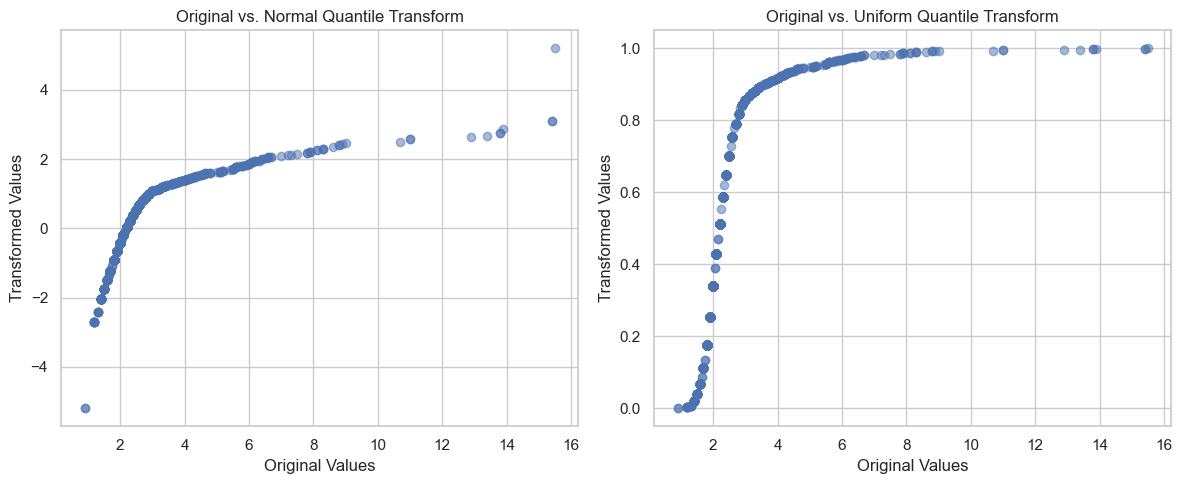

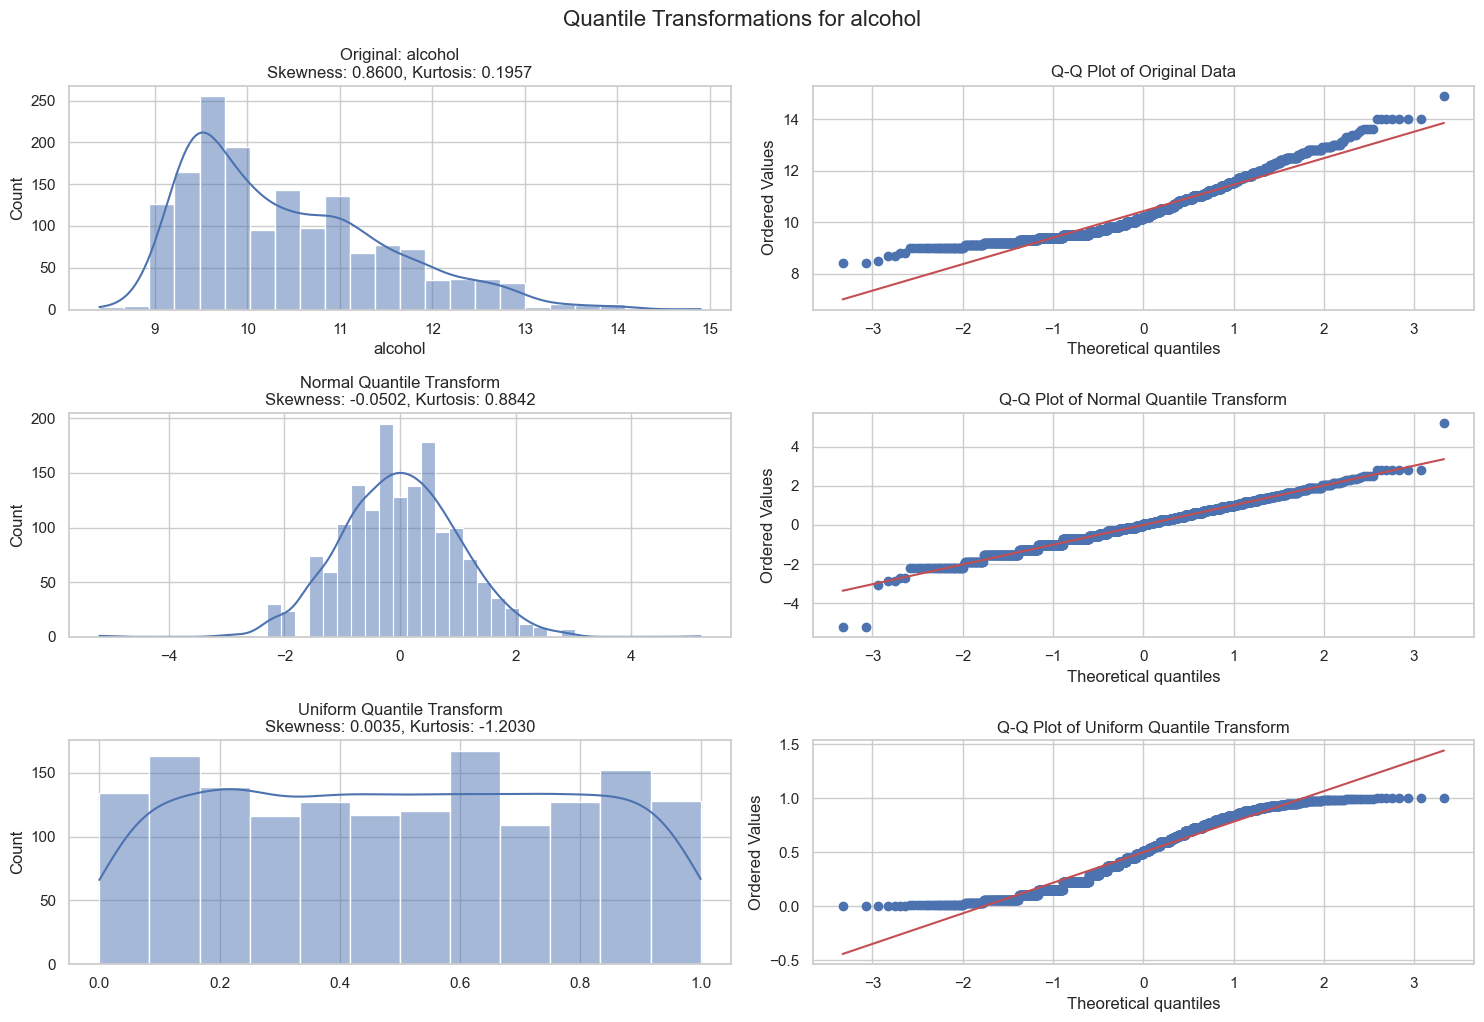


Transformation results for alcohol:
- Original: Skewness = 0.8600, Kurtosis = 0.1957
- Normal Quantile: Skewness = -0.0502, Kurtosis = 0.8842
- Uniform Quantile: Skewness = 0.0035, Kurtosis = -1.2030


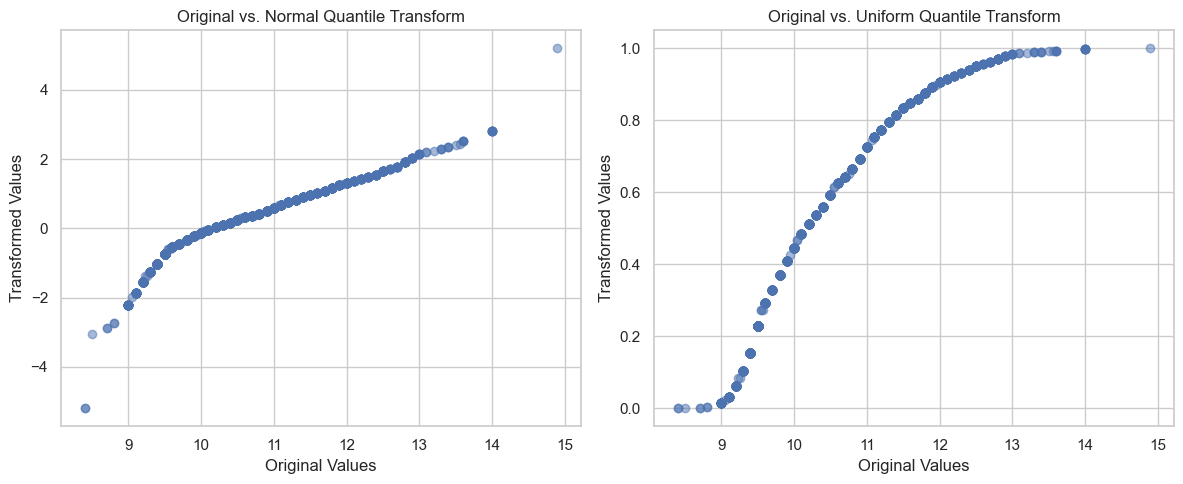

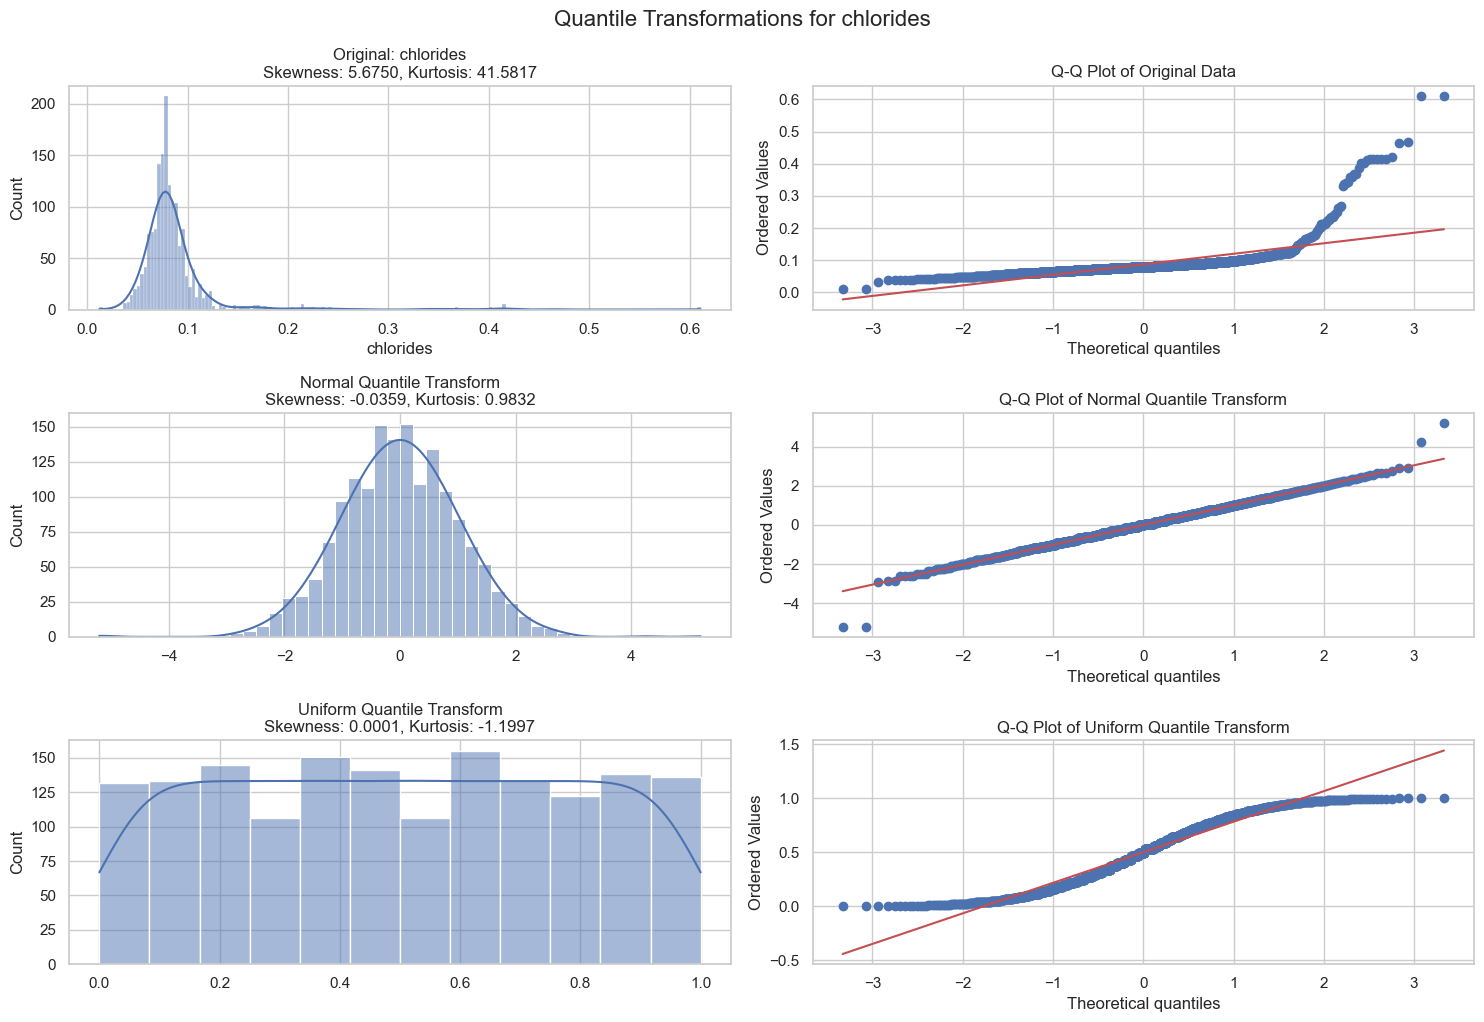


Transformation results for chlorides:
- Original: Skewness = 5.6750, Kurtosis = 41.5817
- Normal Quantile: Skewness = -0.0359, Kurtosis = 0.9832
- Uniform Quantile: Skewness = 0.0001, Kurtosis = -1.1997


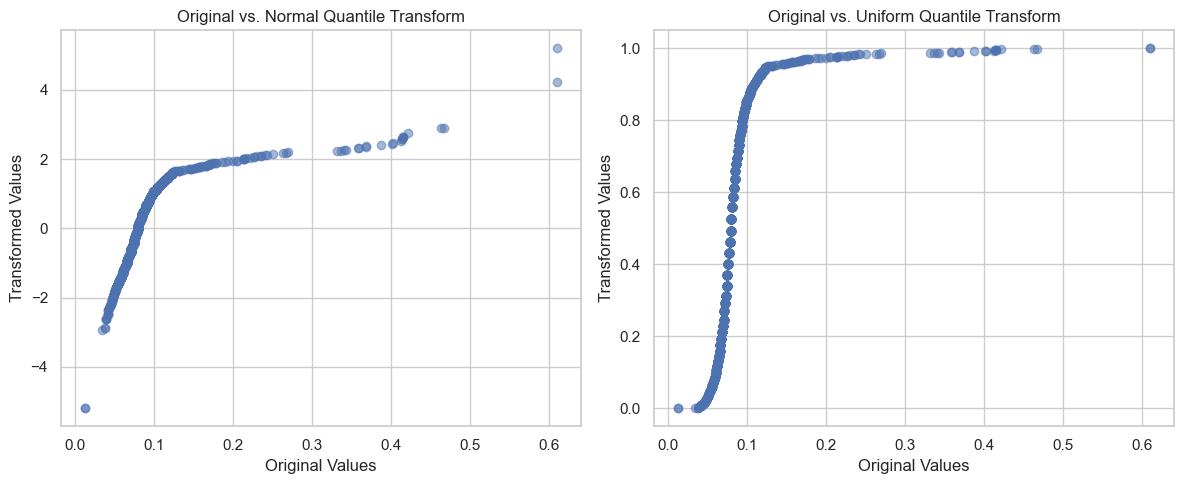

In [12]:
def demonstrate_quantile_transform():
    """Quantile transformation to achieve normality."""
    # Select columns with different distribution shapes
    columns = ['residual sugar', 'alcohol', 'chlorides']

    for col in columns:
        # Original data
        data_orig = wine_data[col].copy()
        skew_orig = stats.skew(data_orig)
        kurt_orig = stats.kurtosis(data_orig)

        # Apply normal quantile transformation
        qt_normal = QuantileTransformer(output_distribution='normal', random_state=42)
        data_qt_normal = qt_normal.fit_transform(data_orig.values.reshape(-1, 1)).flatten()
        skew_qt_normal = stats.skew(data_qt_normal)
        kurt_qt_normal = stats.kurtosis(data_qt_normal)

        # Apply uniform quantile transformation
        qt_uniform = QuantileTransformer(output_distribution='uniform', random_state=42)
        data_qt_uniform = qt_uniform.fit_transform(data_orig.values.reshape(-1, 1)).flatten()
        skew_qt_uniform = stats.skew(data_qt_uniform)
        kurt_qt_uniform = stats.kurtosis(data_qt_uniform)

        # Create plots to compare
        plt.figure(figsize=(15, 10))

        # Original data
        plt.subplot(3, 2, 1)
        sns.histplot(data_orig, kde=True)
        plt.title(f'Original: {col}\nSkewness: {skew_orig:.4f}, Kurtosis: {kurt_orig:.4f}')

        plt.subplot(3, 2, 2)
        stats.probplot(data_orig, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of Original Data')

        # Normal quantile transformation
        plt.subplot(3, 2, 3)
        sns.histplot(data_qt_normal, kde=True)
        plt.title(f'Normal Quantile Transform\nSkewness: {skew_qt_normal:.4f}, Kurtosis: {kurt_qt_normal:.4f}')

        plt.subplot(3, 2, 4)
        stats.probplot(data_qt_normal, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of Normal Quantile Transform')

        # Uniform quantile transformation
        plt.subplot(3, 2, 5)
        sns.histplot(data_qt_uniform, kde=True)
        plt.title(f'Uniform Quantile Transform\nSkewness: {skew_qt_uniform:.4f}, Kurtosis: {kurt_qt_uniform:.4f}')

        plt.subplot(3, 2, 6)
        stats.probplot(data_qt_uniform, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of Uniform Quantile Transform')

        plt.tight_layout()
        plt.suptitle(f'Quantile Transformations for {col}', fontsize=16, y=1.02)
        plt.show()

        print(f"\nTransformation results for {col}:")
        print(f"- Original: Skewness = {skew_orig:.4f}, Kurtosis = {kurt_orig:.4f}")
        print(f"- Normal Quantile: Skewness = {skew_qt_normal:.4f}, Kurtosis = {kurt_qt_normal:.4f}")
        print(f"- Uniform Quantile: Skewness = {skew_qt_uniform:.4f}, Kurtosis = {kurt_qt_uniform:.4f}")

        # Show the relationship between original and transformed data
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(data_orig, data_qt_normal, alpha=0.5)
        plt.title(f'Original vs. Normal Quantile Transform')
        plt.xlabel('Original Values')
        plt.ylabel('Transformed Values')

        plt.subplot(1, 2, 2)
        plt.scatter(data_orig, data_qt_uniform, alpha=0.5)
        plt.title(f'Original vs. Uniform Quantile Transform')
        plt.xlabel('Original Values')
        plt.ylabel('Transformed Values')

        plt.tight_layout()
        plt.show()


# Demonstrate quantile transformation
demonstrate_quantile_transform()

Advantages of Quantile Transformation:
1. Guaranteed to produce the desired distribution shape
2. Works well for any type of continuous distribution
3. Robust to outliers
4. Preserves the rank ordering of the original data

Limitations of Quantile Transformation:
1. Changes the relative distances between data points
2. Can distort relationships between variables
3. Makes interpretation of units difficult
4. May create artificial boundaries at the extremes

Best uses:
- Machine learning algorithms that assume normally distributed features
- When other transformations fail to normalize the data
- Highly skewed or multimodal distributions
- When preserving exact values is less important than distribution shape

# 5. When to Transform Data

When to Transform Data:

1. When statistical tests require normality:
   - t-tests, ANOVA, linear regression
   - Pearson correlation
   - Many parametric statistical methods

2. When visualizations are difficult to interpret:
   - Highly skewed data with most points concentrated in a small area
   - Data spanning many orders of magnitude
   - Outliers obscuring patterns in the main body of data

3. When modeling algorithms perform better with normal features:
   - Linear regression
   - Linear discriminant analysis
   - Some neural network architectures

4. To improve homoscedasticity (equal variance):
   - When variance increases with the mean
   - For regression models where residuals should have constant variance

When NOT to Transform Data:

1. When the original scale is important for interpretation:
   - When the units have intrinsic meaning
   - When communicating results to non-technical audiences

2. When using methods robust to non-normality:
   - Non-parametric tests (Mann-Whitney U, Kruskal-Wallis)
   - Many machine learning algorithms (Random Forest, Gradient Boosting)
   - Robust regression methods

3. When transformations don't improve normality:
   - Some multimodal distributions
   - Distributions with structural zeros or ones
   - Categorical or discrete data masquerading as continuous

4. When data is already approximately normal:
   - Unnecessary transformations can complicate interpretation
   - May introduce other issues like heteroscedasticity


Practical Example with Wine Quality Data:


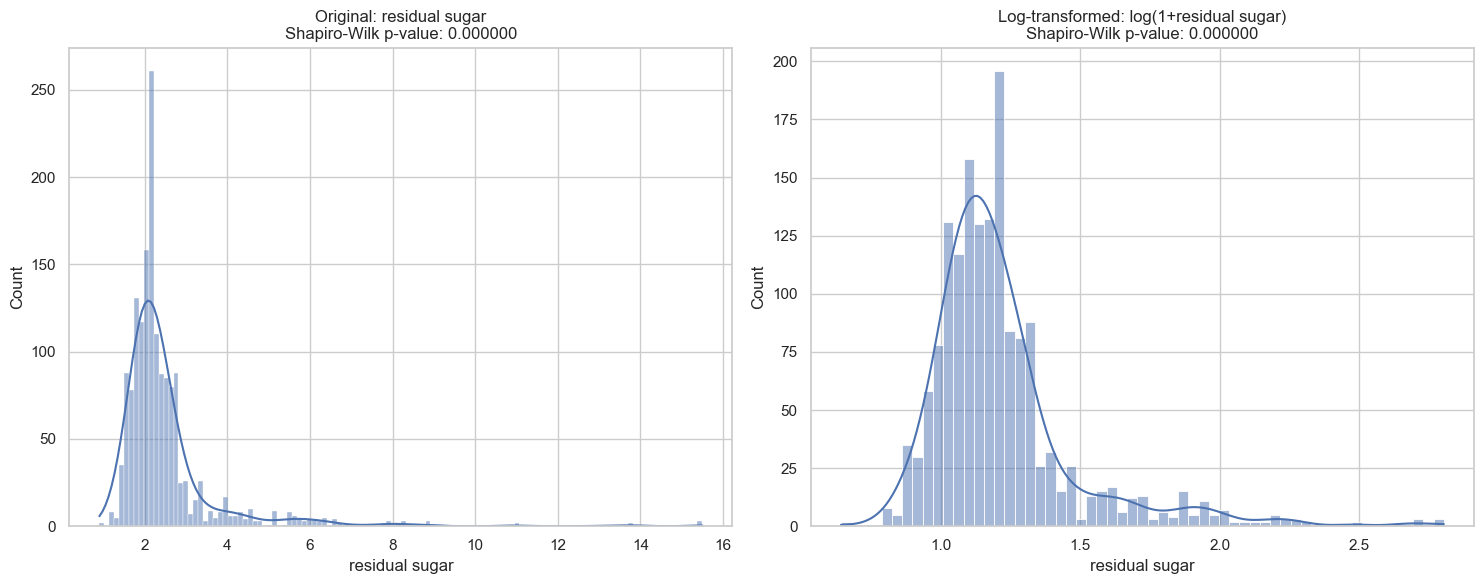


Normality Metrics Comparison for 'residual sugar':
Metric                    Original Data        Log-transformed Data Improvement?   
------------------------- -------------------- -------------------- ---------------
Shapiro-Wilk p-value      0.000000000          0.000000000          Yes
Skewness                  4.5364               2.2530               Yes
Kurtosis                  28.5244              7.1506               Yes
KS Test p-value           0.000000000          0.000000000          Yes

Overall Assessment: 4 out of 4 metrics show improvement

Conclusion: Transformation improved normality
The log transformation helped but did not fully normalize the data
Consider trying other transformations like Box-Cox or square root

Reminder: Always complement statistical tests with visual inspection
The shape of the distribution in the histogram is often more informative than p-values alone

Visual Assessment:
- The transformed data appears less skewed (more symmetric)
- The transf

In [13]:
def when_to_transform():
    """Explain when data transformation is appropriate, with better comparison metrics."""
    # Practical example using wine quality data
    print("\nPractical Example with Wine Quality Data:")

    # Choose a column where transformation might be beneficial
    selected_col = 'residual sugar'

    # Original data
    data_orig = wine_data[selected_col]

    # Apply log transformation (add 1 to avoid log(0))
    data_log = np.log1p(data_orig)  # log(1+x)

    # Calculate multiple normality metrics
    # 1. Shapiro-Wilk test
    stat_orig, p_orig = stats.shapiro(data_orig)
    stat_log, p_log = stats.shapiro(data_log)

    # 2. Skewness and kurtosis
    skew_orig = stats.skew(data_orig)
    skew_log = stats.skew(data_log)
    kurt_orig = stats.kurtosis(data_orig)
    kurt_log = stats.kurtosis(data_log)

    # 3. Kolmogorov-Smirnov test against normal
    # First, standardize the data (z-scores)
    z_orig = (data_orig - np.mean(data_orig)) / np.std(data_orig)
    z_log = (data_log - np.mean(data_log)) / np.std(data_log)
    # Then perform KS test against standard normal
    ks_orig, ks_p_orig = stats.kstest(z_orig, 'norm')
    ks_log, ks_p_log = stats.kstest(z_log, 'norm')

    # Plot original vs transformed
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data_orig, kde=True)
    plt.title(f'Original: {selected_col}\nShapiro-Wilk p-value: {p_orig:.6f}')

    plt.subplot(1, 2, 2)
    sns.histplot(data_log, kde=True)
    plt.title(f'Log-transformed: log(1+{selected_col})\nShapiro-Wilk p-value: {p_log:.6f}')

    plt.tight_layout()
    plt.show()

    # Create a table of normality metrics
    print(f"\nNormality Metrics Comparison for '{selected_col}':")
    print(f"{'Metric':<25} {'Original Data':<20} {'Log-transformed Data':<20} {'Improvement?':<15}")
    print(f"{'-'*25} {'-'*20} {'-'*20} {'-'*15}")

    # Print Shapiro-Wilk results
    print(f"{'Shapiro-Wilk p-value':<25} {p_orig:<20.9f} {p_log:<20.9f} {'Yes' if p_log > p_orig*1.1 else 'No'}")

    # Print skewness results
    print(f"{'Skewness':<25} {skew_orig:<20.4f} {skew_log:<20.4f} {'Yes' if abs(skew_log) < abs(skew_orig)*0.9 else 'No'}")

    # Print kurtosis results
    print(f"{'Kurtosis':<25} {kurt_orig:<20.4f} {kurt_log:<20.4f} {'Yes' if abs(kurt_log) < abs(kurt_orig)*0.9 else 'No'}")

    # Print KS test results
    print(f"{'KS Test p-value':<25} {ks_p_orig:<20.9f} {ks_p_log:<20.9f} {'Yes' if ks_p_log > ks_p_orig*1.1 else 'No'}")

    # Calculate improvement scores
    improvements = 0
    total_metrics = 4

    if p_log > p_orig*1.1:
        improvements += 1
    if abs(skew_log) < abs(skew_orig)*0.9:
        improvements += 1
    if abs(kurt_log) < abs(kurt_orig)*0.9:
        improvements += 1
    if ks_p_log > ks_p_orig*1.1:
        improvements += 1

    # Overall conclusion based on multiple metrics
    print(f"\nOverall Assessment: {improvements} out of {total_metrics} metrics show improvement")

    if improvements >= total_metrics/2:
        print("\nConclusion: Transformation improved normality")
        if p_log > 0.05 or (abs(skew_log) < 0.5 and abs(kurt_log) < 0.5):
            print("The log transformation significantly improved the distribution's normality")
        else:
            print("The log transformation helped but did not fully normalize the data")
            print("Consider trying other transformations like Box-Cox or square root")
    else:
        print("\nConclusion: Transformation did not substantially improve normality")
        print("In this case, it might be better to use the original data or try a different transformation")

    # Visual assessment reminder
    print("\nReminder: Always complement statistical tests with visual inspection")
    print("The shape of the distribution in the histogram is often more informative than p-values alone")

    # Provide information about what to look for visually
    print("\nVisual Assessment:")
    if abs(skew_orig) > abs(skew_log):
        print("- The transformed data appears less skewed (more symmetric)")
    if abs(kurt_orig) > abs(kurt_log):
        print("- The transformed data has tail weight closer to a normal distribution")

when_to_transform()

Above, we see that Transformation improved normality, even if not perfectly normal. The log transformation improved normality but did not fully normalize the data

Decision Flowchart for Data Transformation:
1. Test for normality (Shapiro-Wilk, Anderson-Darling, Q-Q plot)
2. If data is normal, no transformation needed
3. If data is non-normal, consider your analysis requirements:
   a. If normality is required, try appropriate transformations
   b. If normality is not required, consider non-parametric methods
4. After transformation, verify improvement with statistical tests
5. Consider interpretability and trade-offs in your decision

**Key Takeaways from Understanding Data Distributions:**

1. Normal Distribution:
   - Bell-shaped, symmetric around the mean
   - 68% of data within 1 SD, 95% within 2 SD, 99.7% within 3 SD
   - Many statistical tests assume normality

2. Non-Normal Distributions:
   - Common types: uniform, exponential, log-normal, gamma, bimodal
   - Characterized by skewness (asymmetry) and kurtosis (tail weight)
   - Natural in many real-world scenarios (e.g., income, reaction times)

3. Testing for Normality:
   - Visual: histograms, Q-Q plots
   - Statistical: Shapiro-Wilk test, Anderson-Darling test
   - Each test has its strengths and limitations

4. Data Transformations:
   - Log: right-skewed data with multiplicative effects
   - Square root: count data with moderate right skew
   - Box-Cox: automatic power transformation
   - Quantile: guarantees specific distribution shape

5. When to Transform:
   - When statistical tests require normality
   - When visualizations are hard to interpret
   - When equal variance is needed
   - Consider interpretability trade-offs

Next tutorial preview: Comparing Two Groups: Parametric Tests
We'll explore how to compare means between two groups using
parametric tests like t-tests, and how to interpret the results.
Dataset: UCI Heart Disease